# Selección de datos. CCAA: Euskadi

In [129]:
import pandas as pd
import os
import json
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# Import libraries for training the models
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


In [10]:
path = "C:/Users/TheBridge/Desktop/Desafio_Reto2/data/"


# Selección de datos: Dataset-Combustible

+ Descargamos los datos del tipo de combustible y sus características desde el [Geoportal de gasolineras](https://geoportalgasolineras.es/geoportal-instalaciones/Inicio). Inicialmente, el conjunto de datos comprendía desde 2007 a 2024 para todas las comunidades autónomas. Seleccionamos solo los datos correspondientes al periodo 2022 a 2024 y a la comunidad autónoma de Euskadi.

In [ ]:
# Rango de valores 
años = [str(año) for año in range(2022, 2025)]   # 2022 a 2025
meses = [f"{i:02d}" for i in range(1, 13)]       # '01' a '12'

# Carpeta donde guardar los nuevos archivos
datos_combinados = []

# Recorremos todas las combinaciones
for año in años:
        for mes in meses:
            ruta = os.path.join(path, año, mes)
            
            if os.path.exists(ruta):
                archivos = os.listdir(ruta)
                archivos_json = [f for f in archivos if f.endswith('.json')]
                
                if archivos_json:
                    print(f"Procesando carpeta: {ruta} - {len(archivos_json)} archivos JSON")
                
                for archivo in archivos:
                    if archivo.endswith('.json'):
                        ruta_archivo = os.path.join(ruta, archivo)
                        try:
                            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                                contenido = json.load(f)
                                
                                # Check if the JSON structure has 'ListaEESSPrecio' (your original format)
                                if 'ListaEESSPrecio' in contenido:
                                    fecha = contenido.get('Fecha', '')
                                    for estacion in contenido['ListaEESSPrecio']:
                                        # Create a new dictionary for each gas station
                                        nuevo = {'Fecha': fecha}  # Add the date first
                                        
                                        # Extract all fields from each station
                                        for clave, valor in estacion.items():
                                            nuevo[clave] = valor
                                        
                                        datos_combinados.append(nuevo)
                                
                                # Check if the JSON is a list of stations (alternative format)
                                elif isinstance(contenido, list):
                                    # Extract date from filename if not in content
                                    fecha_archivo = archivo.replace('.json', '')
                                    for estacion in contenido:
                                        nuevo = {'Fecha': fecha_archivo}
                                        for clave, valor in estacion.items():
                                            nuevo[clave] = valor
                                        datos_combinados.append(nuevo)
                                
                                # Check if it's a single station object
                                elif isinstance(contenido, dict) and any(key.startswith('Precio') for key in contenido.keys()):
                                    fecha_archivo = archivo.replace('.json', '')
                                    nuevo = {'Fecha': fecha_archivo}
                                    for clave, valor in contenido.items():
                                        nuevo[clave] = valor
                                    datos_combinados.append(nuevo)
                                
                                else:
                                    print(f"Formato JSON no reconocido en {ruta_archivo}")
                                    print(f"Claves encontradas: {list(contenido.keys()) if isinstance(contenido, dict) else 'No es diccionario'}")
                                        
                        except Exception as e:
                            print(f"Error leyendo {ruta_archivo}: {e}")
            # Removed the "Ruta no existe" message to reduce console output

# Convertir la lista de diccionarios en un DataFrame
if datos_combinados:
    df = pd.DataFrame(datos_combinados)
    
    # Guardar como CSV
    output_path = os.path.join(path, 'datos_combinados_combustibleEuskadi2022-2025.csv')
    df.to_csv(output_path, index=False, encoding='utf-8')
    
    print(f"Total de registros combinados: {len(datos_combinados)}")
    print(f"Archivo guardado en: {output_path}")
    print(f"Columnas en el CSV: {list(df.columns)}")
else:
    print("No se encontraron datos para procesar.")

Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\01 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\02 - 28 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\03 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\04 - 30 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\05 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\06 - 30 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\07 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\08 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/D

In [11]:
df_combustible = pd.read_csv(path + "datos_combinados_combustibleEuskadi2022-2025.csv")
df_combustible.head()

C:\Users\TheBridge\AppData\Local\Temp\ipykernel_9088\285068925.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combustible = pd.read_csv(path + "datos_combinados_combustibleEuskadi2022-2025.csv")


,Fecha,C.P.,Dirección,Horario,Latitud,Localidad,Longitud (WGS84),Margen,Municipio,Precio Adblue,...,Provincia,Remisión,Rótulo,Tipo Venta,% BioEtanol,% Éster metílico,IDEESS,IDMunicipio,IDProvincia,IDCCAA
0,01/01/2022 0:00:00,1240,"CL MANISITU, 9",L-D: 24H,"42,846028",ALEGRIA-DULANTZI,"-2,509361",D,Alegría-Dulantzi,NaN,...,ARABA/ÁLAVA,dm,"PREMIRA ENERGIA NORTE, S.L.",P,"0,0","0,0",9381,1,1,16
1,01/01/2022 0:00:00,1240,"CALLE GASTEIZBIDEA, 59",L-D: 07:00-22:00,"42,842917",ALEGRIA-DULANTZI,"-2,519194",D,Alegría-Dulantzi,NaN,...,ARABA/ÁLAVA,dm,ES DULANTZI REPSOL,P,"0,0","0,0",14209,1,1,16
2,01/01/2022 0:00:00,1468,"POLIGONO ZANKUETA, 0",L-D: 24H,"43,044333",LARRINBE,"-2,989111",D,Amurrio,NaN,...,ARABA/ÁLAVA,dm,ESTACIONES GB,P,"0,0","0,0",13543,2,1,16
3,01/01/2022 0:00:00,1450,"CARRETERA A-624 KM. 37,8",L-D: 06:00-22:00,"43,031889",LEZAMA,"-2,967611",D,Amurrio,NaN,...,ARABA/ÁLAVA,dm,MOEVE,P,"0,0","0,0",45,2,1,16
4,01/01/2022 0:00:00,1474,"AVENIDA GARAY, 23",L-D: 06:00-22:00,"43,123361",ARTZINIEGA,"-3,122528",D,Artziniega,NaN,...,ARABA/ÁLAVA,dm,AVIA,P,"0,0","0,0",5,8,1,16


In [12]:
df_combustible.columns

Index(['Fecha', 'C.P.', 'Dirección', 'Horario', 'Latitud', 'Localidad',
       'Longitud (WGS84)', 'Margen', 'Municipio', 'Precio Adblue',
       'Precio Amoniaco', 'Precio Biodiesel', 'Precio Bioetanol',
       'Precio Biogas Natural Comprimido', 'Precio Biogas Natural Licuado',
       'Precio Diésel Renovable', 'Precio Gas Natural Comprimido',
       'Precio Gas Natural Licuado', 'Precio Gases licuados del petróleo',
       'Precio Gasoleo A', 'Precio Gasoleo B', 'Precio Gasoleo Premium',
       'Precio Gasolina 95 E10', 'Precio Gasolina 95 E25',
       'Precio Gasolina 95 E5', 'Precio Gasolina 95 E5 Premium',
       'Precio Gasolina 95 E85', 'Precio Gasolina 98 E10',
       'Precio Gasolina 98 E5', 'Precio Gasolina Renovable',
       'Precio Hidrogeno', 'Precio Metanol', 'Provincia', 'Remisión', 'Rótulo',
       'Tipo Venta', '% BioEtanol', '% Éster metílico', 'IDEESS',
       'IDMunicipio', 'IDProvincia', 'IDCCAA'],
      dtype='object')

In [13]:
# Seleccion de columnas del dataset de combustible
columns = ['Dirección', 'Horario','Localidad','Margen', 'Municipio', 'Provincia', 'Remisión', 'Rótulo',
       'Tipo Venta', '% BioEtanol', '% Éster metílico', 'IDEESS',
       'IDMunicipio', 'IDProvincia', 'IDCCAA']

df_combustible_precios = df_combustible.drop(columns=columns)

df_combustible_precios.head()

,Fecha,C.P.,Latitud,Longitud (WGS84),Precio Adblue,Precio Amoniaco,Precio Biodiesel,Precio Bioetanol,Precio Biogas Natural Comprimido,Precio Biogas Natural Licuado,...,Precio Gasolina 95 E10,Precio Gasolina 95 E25,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 95 E85,Precio Gasolina 98 E10,Precio Gasolina 98 E5,Precio Gasolina Renovable,Precio Hidrogeno,Precio Metanol
0,01/01/2022 0:00:00,1240,"42,846028","-2,509361",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2022 0:00:00,1240,"42,842917","-2,519194",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,559",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2022 0:00:00,1468,"43,044333","-2,989111",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,499",NaN,NaN,NaN,"1,639",NaN,NaN,NaN
3,01/01/2022 0:00:00,1450,"43,031889","-2,967611",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,559",NaN,NaN,NaN,"1,691",NaN,NaN,NaN
4,01/01/2022 0:00:00,1474,"43,123361","-3,122528",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,525",NaN,NaN,NaN,"1,625",NaN,NaN,NaN


In [14]:
df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Fecha                               366746 non-null  object 
 1   C.P.                                366746 non-null  int64  
 2   Latitud                             366746 non-null  object 
 3   Longitud (WGS84)                    366746 non-null  object 
 4   Precio Adblue                       0 non-null       float64
 5   Precio Amoniaco                     0 non-null       float64
 6   Precio Biodiesel                    3738 non-null    object 
 7   Precio Bioetanol                    1449 non-null    object 
 8   Precio Biogas Natural Comprimido    0 non-null       float64
 9   Precio Biogas Natural Licuado       0 non-null       float64
 10  Precio Diésel Renovable             0 non-null       float64
 11  Precio Gas Natural Comprim

In [15]:
# Eliminamos missing data
df_combustible_precios = df_combustible_precios.dropna(axis = 1, how='all')

df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Fecha                               366746 non-null  object
 1   C.P.                                366746 non-null  int64 
 2   Latitud                             366746 non-null  object
 3   Longitud (WGS84)                    366746 non-null  object
 4   Precio Biodiesel                    3738 non-null    object
 5   Precio Bioetanol                    1449 non-null    object
 6   Precio Gas Natural Comprimido       10923 non-null   object
 7   Precio Gas Natural Licuado          7019 non-null    object
 8   Precio Gases licuados del petróleo  38893 non-null   object
 9   Precio Gasoleo A                    358766 non-null  object
 10  Precio Gasoleo B                    62431 non-null   object
 11  Precio Gasoleo Premium              250

In [16]:
df_combustible_precios

,Fecha,C.P.,Latitud,Longitud (WGS84),Precio Biodiesel,Precio Bioetanol,Precio Gas Natural Comprimido,Precio Gas Natural Licuado,Precio Gases licuados del petróleo,Precio Gasoleo A,Precio Gasoleo B,Precio Gasoleo Premium,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 98 E5
0,01/01/2022 0:00:00,1240,"42,846028","-2,509361",NaN,NaN,NaN,NaN,NaN,"1,379","0,726",NaN,NaN,NaN,NaN
1,01/01/2022 0:00:00,1240,"42,842917","-2,519194",NaN,NaN,NaN,NaN,NaN,"1,419",NaN,NaN,"1,559",NaN,NaN
2,01/01/2022 0:00:00,1468,"43,044333","-2,989111",NaN,NaN,NaN,NaN,NaN,"1,369",NaN,"1,439","1,499",NaN,"1,639"
3,01/01/2022 0:00:00,1450,"43,031889","-2,967611",NaN,NaN,NaN,NaN,NaN,"1,429",NaN,"1,495","1,559",NaN,"1,691"
4,01/01/2022 0:00:00,1474,"43,123361","-3,122528",NaN,NaN,NaN,NaN,NaN,"1,395","0,955","1,445","1,525",NaN,"1,625"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,31/12/2024 0:00:00,48170,"43,276028","-2,851000",NaN,NaN,NaN,NaN,NaN,"1,369",NaN,NaN,"1,439",NaN,NaN
366742,31/12/2024 0:00:00,48170,"43,280111","-2,852861",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,489",NaN,"1,589",NaN
366743,31/12/2024 0:00:00,48170,"43,293278","-2,896722",NaN,NaN,NaN,NaN,NaN,"1,264",NaN,NaN,"1,329",NaN,NaN
366744,31/12/2024 0:00:00,48160,"43,318583","-2,876444",NaN,NaN,NaN,NaN,"0,949","1,539",NaN,NaN,"1,579",NaN,"1,729"


In [17]:
#Cambio de nombre de la columna
df_combustible_precios = df_combustible_precios.rename(columns={'Longitud (WGS84)': 'Longitud'})

# Cambio del tipo de string a float para las columnas de Latitud y Longitud
df_combustible_precios['Latitud']= df_combustible_precios['Latitud'].str.replace(',', '.').astype(float)
df_combustible_precios['Longitud']= df_combustible_precios['Longitud'].str.replace(',', '.').astype(float)

In [18]:

df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Fecha                               366746 non-null  object 
 1   C.P.                                366746 non-null  int64  
 2   Latitud                             366746 non-null  float64
 3   Longitud                            366746 non-null  float64
 4   Precio Biodiesel                    3738 non-null    object 
 5   Precio Bioetanol                    1449 non-null    object 
 6   Precio Gas Natural Comprimido       10923 non-null   object 
 7   Precio Gas Natural Licuado          7019 non-null    object 
 8   Precio Gases licuados del petróleo  38893 non-null   object 
 9   Precio Gasoleo A                    358766 non-null  object 
 10  Precio Gasoleo B                    62431 non-null   object 
 11  Precio Gasoleo Premium    

In [19]:
df_combustible_precios['Precio Biodiesel'] = df_combustible_precios['Precio Biodiesel'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Bioetanol'] = df_combustible_precios['Precio Bioetanol'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gas Natural Comprimido'] = df_combustible_precios['Precio Gas Natural Comprimido'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gas Natural Licuado'] = df_combustible_precios['Precio Gas Natural Licuado'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gases licuados del petróleo'] = df_combustible_precios['Precio Gases licuados del petróleo'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo A'] = df_combustible_precios['Precio Gasoleo A'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo B'] = df_combustible_precios['Precio Gasoleo B'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo Premium'] = df_combustible_precios['Precio Gasoleo Premium'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 95 E5'] = df_combustible_precios['Precio Gasolina 95 E5'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 95 E5 Premium'] = df_combustible_precios['Precio Gasolina 95 E5 Premium'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 98 E5'] = df_combustible_precios['Precio Gasolina 98 E5'].str.replace(',', '.').astype(float)

In [20]:
df_combustible_precios['Precio Biodiesel'] = df_combustible_precios['Precio Biodiesel'].fillna(df_combustible_precios['Precio Biodiesel'].mean())
df_combustible_precios['Precio Bioetanol'] = df_combustible_precios['Precio Bioetanol'].fillna(df_combustible_precios['Precio Bioetanol'].mean())
df_combustible_precios['Precio Gas Natural Comprimido'] = df_combustible_precios['Precio Gas Natural Comprimido'].fillna(df_combustible_precios['Precio Gas Natural Comprimido'].mean())
df_combustible_precios['Precio Gas Natural Licuado'] = df_combustible_precios['Precio Gas Natural Licuado'].fillna(df_combustible_precios['Precio Gas Natural Licuado'].mean())
df_combustible_precios['Precio Gases licuados del petróleo'] = df_combustible_precios['Precio Gases licuados del petróleo'].fillna(df_combustible_precios['Precio Gases licuados del petróleo'].mean())
df_combustible_precios['Precio Gasoleo A'] = df_combustible_precios['Precio Gasoleo A'].fillna(df_combustible_precios['Precio Gasoleo A'].mean())
df_combustible_precios['Precio Gasoleo B'] = df_combustible_precios['Precio Gasoleo B'].fillna(df_combustible_precios['Precio Gasoleo B'].mean())
df_combustible_precios['Precio Gasoleo Premium'] = df_combustible_precios['Precio Gasoleo Premium'].fillna(df_combustible_precios['Precio Gasoleo Premium'].mean())
df_combustible_precios['Precio Gasolina 95 E5'] = df_combustible_precios['Precio Gasolina 95 E5'].fillna(df_combustible_precios['Precio Gasolina 95 E5'].mean())
df_combustible_precios['Precio Gasolina 95 E5 Premium'] = df_combustible_precios['Precio Gasolina 95 E5 Premium'].fillna(df_combustible_precios['Precio Gasolina 95 E5 Premium'].mean())
df_combustible_precios['Precio Gasolina 98 E5'] = df_combustible_precios['Precio Gasolina 98 E5'].fillna(df_combustible_precios['Precio Gasolina 98 E5'].mean())


In [21]:
df_combustible_precios

,Fecha,C.P.,Latitud,Longitud,Precio Biodiesel,Precio Bioetanol,Precio Gas Natural Comprimido,Precio Gas Natural Licuado,Precio Gases licuados del petróleo,Precio Gasoleo A,Precio Gasoleo B,Precio Gasoleo Premium,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 98 E5
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,1.791813,1.63908,1.441664,1.404936,0.95078,1.379000,0.726000,1.749672,1.699481,1.761606,1.863838
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,1.791813,1.63908,1.441664,1.404936,0.95078,1.419000,1.356982,1.749672,1.559000,1.761606,1.863838
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,1.791813,1.63908,1.441664,1.404936,0.95078,1.369000,1.356982,1.439000,1.499000,1.761606,1.639000
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,1.791813,1.63908,1.441664,1.404936,0.95078,1.429000,1.356982,1.495000,1.559000,1.761606,1.691000
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,1.791813,1.63908,1.441664,1.404936,0.95078,1.395000,0.955000,1.445000,1.525000,1.761606,1.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,31/12/2024 0:00:00,48170,43.276028,-2.851000,1.791813,1.63908,1.441664,1.404936,0.95078,1.369000,1.356982,1.749672,1.439000,1.761606,1.863838
366742,31/12/2024 0:00:00,48170,43.280111,-2.852861,1.791813,1.63908,1.441664,1.404936,0.95078,1.645545,1.356982,1.489000,1.699481,1.589000,1.863838
366743,31/12/2024 0:00:00,48170,43.293278,-2.896722,1.791813,1.63908,1.441664,1.404936,0.95078,1.264000,1.356982,1.749672,1.329000,1.761606,1.863838
366744,31/12/2024 0:00:00,48160,43.318583,-2.876444,1.791813,1.63908,1.441664,1.404936,0.94900,1.539000,1.356982,1.749672,1.579000,1.761606,1.729000


In [22]:

# Extraer nombres de columnas de carburantes
carburante_cols = []
for col in df_combustible_precios.columns:
    if col.startswith('Precio'):
        carburante_cols.append(col)

# Crear un DataFrame con identificador
df_carburantes_id = pd.DataFrame({
    'id_carburante': range(1, len(carburante_cols) + 1),
    'nombre_carburante': carburante_cols
})




In [23]:
df_long = df_combustible_precios.melt(
    id_vars=[col for col in df_combustible_precios.columns if col not in carburante_cols],
    value_vars=carburante_cols,
    var_name='nombre_carburante',
    value_name='precio'
)
df_long = df_long.merge(df_carburantes_id, on='nombre_carburante')

df_long.head()


,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Precio Biodiesel,1.791813,1
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Precio Biodiesel,1.791813,1
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Precio Biodiesel,1.791813,1
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Precio Biodiesel,1.791813,1
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Precio Biodiesel,1.791813,1


In [24]:
#Eliminar la palabra precio de los nombres de carburantes
df_long['nombre_carburante'] = df_long['nombre_carburante'].str.replace('Precio ', '').astype(str)

df_long


,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Biodiesel,1.791813,1
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Biodiesel,1.791813,1
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Biodiesel,1.791813,1
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Biodiesel,1.791813,1
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Biodiesel,1.791813,1
...,...,...,...,...,...,...,...
4034201,31/12/2024 0:00:00,48170,43.276028,-2.851000,Gasolina 98 E5,1.863838,11
4034202,31/12/2024 0:00:00,48170,43.280111,-2.852861,Gasolina 98 E5,1.863838,11
4034203,31/12/2024 0:00:00,48170,43.293278,-2.896722,Gasolina 98 E5,1.863838,11
4034204,31/12/2024 0:00:00,48160,43.318583,-2.876444,Gasolina 98 E5,1.729000,11


In [25]:
df_long['nombre_carburante'].unique()

array(['Biodiesel', 'Bioetanol', 'Gas Natural Comprimido',
       'Gas Natural Licuado', 'Gases licuados del petróleo', 'Gasoleo A',
       'Gasoleo B', 'Gasoleo Premium', 'Gasolina 95 E5',
       'Gasolina 95 E5 Premium', 'Gasolina 98 E5'], dtype=object)

In [26]:
#Añadir columna de energia por unidad (kWh/L)
df_long['energia_kWh'] = df_long['nombre_carburante'].map({
    'Biodiesel': 9.2,
    'Bioetanol': 5.9,
    'Gas Natural Comprimido': 13.1,
    'Gas Natural Licuado': 13.9,
    'Gases licuados del petróleo': 6.9,
    'Gasoleo A': 10.2,
    'Gasoleo B': 10.2,
    'Gasoleo Premium': 10.2,
    'Gasolina 95 E5': 9.25,
    'Gasolina 95 E5 Premium': 9.25,
    'Gasolina 98 E5': 9.25
})


In [27]:
df_long

,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante,energia_kWh
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Biodiesel,1.791813,1,9.20
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Biodiesel,1.791813,1,9.20
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Biodiesel,1.791813,1,9.20
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Biodiesel,1.791813,1,9.20
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Biodiesel,1.791813,1,9.20
...,...,...,...,...,...,...,...,...
4034201,31/12/2024 0:00:00,48170,43.276028,-2.851000,Gasolina 98 E5,1.863838,11,9.25
4034202,31/12/2024 0:00:00,48170,43.280111,-2.852861,Gasolina 98 E5,1.863838,11,9.25
4034203,31/12/2024 0:00:00,48170,43.293278,-2.896722,Gasolina 98 E5,1.863838,11,9.25
4034204,31/12/2024 0:00:00,48160,43.318583,-2.876444,Gasolina 98 E5,1.729000,11,9.25


In [28]:
df_long.to_csv(path + "df_combustible_precios_euskadi_2022-2025.csv")

# Selección de datos: Dataset-Estación de Servicio 

+ De la misma manera que para los datos de combustibles, seleccionamos datos de las estaciones de servicio a nivel de la CCAA de Euskadi

In [30]:
df_estaciones_servicio = pd.read_csv(path + 'EstacionesDeServicio#.csv', encoding='utf-8', sep='|', decimal=',')
df_estaciones_servicio.columns


Index(['Id', 'Rotulo', 'Operador', 'Direccion', 'Margen', 'CodPostal', 'CCAA',
       'Provincia', 'Municipio', 'Localidad', 'CoordenadaX', 'CoordenadaXDec',
       'CoordenadaY', 'CoordenadaYDec', 'FechaPvp', 'HoraPvp', 'TipoVenta',
       'Remision', 'Horario', 'TipoServicio', 'PorcentajeBioetanol',
       'PorcentajeBioalcohol'],
      dtype='object')

In [31]:
df_estaciones_servicio_v2= df_estaciones_servicio.drop(columns=['Id','Operador', 'Margen', 'CoordenadaX', 'CoordenadaY', 'TipoVenta', 'Remision', 'TipoServicio', 'PorcentajeBioetanol', 'PorcentajeBioalcohol'])

In [32]:
filter= df_estaciones_servicio_v2['CCAA'] ==  'Pa#s Vasco'

euskadi_ES = df_estaciones_servicio_v2[filter]

euskadi_ES.head()

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,CoordenadaXDec,CoordenadaYDec,FechaPvp,HoraPvp,Horario
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00


In [33]:
euskadi_ES = euskadi_ES.rename(columns={'CoordenadaXDec': 'Longitud', 'CoordenadaYDec': 'Latitud'})
euskadi_ES['Latitud']= euskadi_ES['Latitud'].astype(float)
euskadi_ES['Longitud']= euskadi_ES['Longitud'].astype(float)

In [34]:
euskadi_ES

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
11684,PETROPRIX,CALLE ANTXITURRI 1,20570,Pa#s Vasco,GIPUZKOA,Bergara,BERGARA,-2.422500,43.126389,19/09/2025,18:28,L-D: 07:00-22:00
11727,EUSKADI LOW COST,CALLE BO SORAVILLA 998,20140,Pa#s Vasco,GIPUZKOA,Andoain,ANDOAIN,-2.021194,43.218639,17/09/2025,12:19,L-D: 24H
11765,NAFTE,CALLE RETUERTO 42,48903,Pa#s Vasco,BIZKAIA,Barakaldo,SAN VICENTE DE BARAKALDO,-3.002750,43.286667,16/09/2025,11:29,L-D: 24H
11830,AVIA,CARRETERA NACIONAL N-1 (IRUN-MADRID) KM. 417,20212,Pa#s Vasco,GIPUZKOA,Olaberria,OLABERRIA,-2.216667,43.038889,17/09/2025,07:41,L-D: 24H


In [35]:
#Creando la columnas coordenadas mediante la concatenacion de las columnas latitud y longitud
euskadi_ES['coordenadas'] = list(zip(euskadi_ES['Latitud'], euskadi_ES['Longitud']))
euskadi_ES.head()


,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario,coordenadas
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H,"(43.323611, -1.879944)"
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H,"(42.865278, -2.661139)"
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00,"(43.307222, -3.078528)"
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00,"(43.170556, -2.597556)"
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00,"(43.281972, -1.916778)"


In [36]:
#Por cada coordenada obtener un id unico
euskadi_ES['id_ES'] = euskadi_ES['coordenadas'].factorize()[0] + 1
euskadi_ES.head()

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario,coordenadas,id_ES
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H,"(43.323611, -1.879944)",1
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H,"(42.865278, -2.661139)",2
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00,"(43.307222, -3.078528)",3
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00,"(43.170556, -2.597556)",4
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00,"(43.281972, -1.916778)",5


In [37]:
euskadi_ES.to_csv(path + "estaciones_servicio_euskadi.csv", index=False)

# DataSet: Tickets



Usamos como ejemplo varias facturas para identificar que campos informativos son relevantes. Los datos generados incluyeron: 

+ Cantidad en Litros
+ Tipo de combustible
+ Precio por Litro
+ Fecha
+ Hora 
+ Latitud 
+ Longitud
+ $ \text{Importe} = \text{PrecioLitros} \times \text{CantidadLitros} $

Nota: Los datos  sobre los litros repostados se generan considerando que se trata de una flota de autobuses. El repostaje estandar máximo incluye hasta los 1500 litros.

In [38]:
Fecha = df_combustible_precios['Fecha']
Latitud = df_combustible_precios['Latitud']
Longitud = df_combustible_precios['Longitud']

In [39]:
coordenadas = list(zip(Latitud, Longitud))
coordenadas


[(42.846028, -2.509361),
 (42.842917, -2.519194),
 (43.044333, -2.989111),
 (43.031889, -2.967611),
 (43.123361, -3.122528),
 (42.876861, -2.616361),
 (42.870861, -2.312056),
 (42.866417, -2.278694),
 (42.670222, -2.357278),
 (42.878556, -2.518167),
 (42.635194, -2.849833),
 (42.547639, -2.578806),
 (43.148639, -2.951361),
 (43.138, -2.968),
 (42.753194, -2.477917),
 (42.490611, -2.432278),
 (42.743111, -2.913306),
 (42.741361, -2.913222),
 (42.704639, -2.917639),
 (42.692917, -2.920667),
 (42.710639, -2.906944),
 (42.848944, -2.394583),
 (42.852694, -2.379083),
 (42.8635, -2.320361),
 (42.863583, -2.324083),
 (42.871167, -2.314083),
 (42.849778, -2.648306),
 (42.836778, -2.698917),
 (42.837111, -2.700972),
 (42.842833, -2.682278),
 (42.864944, -2.7105),
 (42.854694, -2.708611),
 (42.857194, -2.716389),
 (42.863778, -2.712722),
 (42.852417, -2.709972),
 (42.849028, -2.693722),
 (42.857667, -2.717833),
 (42.836667, -2.66),
 (42.837083, -2.657611),
 (42.838722, -2.6645),
 (42.836833, -2.

In [40]:
df_combustible_precios.columns

Index(['Fecha', 'C.P.', 'Latitud', 'Longitud', 'Precio Biodiesel',
       'Precio Bioetanol', 'Precio Gas Natural Comprimido',
       'Precio Gas Natural Licuado', 'Precio Gases licuados del petróleo',
       'Precio Gasoleo A', 'Precio Gasoleo B', 'Precio Gasoleo Premium',
       'Precio Gasolina 95 E5', 'Precio Gasolina 95 E5 Premium',
       'Precio Gasolina 98 E5'],
      dtype='object')

In [41]:
df_long.columns

Index(['Fecha', 'C.P.', 'Latitud', 'Longitud', 'nombre_carburante', 'precio',
       'id_carburante', 'energia_kWh'],
      dtype='object')

In [42]:
Carburantes = df_long.drop(columns =['Fecha', 'C.P.', 'Latitud', 'Longitud'])
Carburantes

,nombre_carburante,precio,id_carburante,energia_kWh
0,Biodiesel,1.791813,1,9.20
1,Biodiesel,1.791813,1,9.20
2,Biodiesel,1.791813,1,9.20
3,Biodiesel,1.791813,1,9.20
4,Biodiesel,1.791813,1,9.20
...,...,...,...,...
4034201,Gasolina 98 E5,1.863838,11,9.25
4034202,Gasolina 98 E5,1.863838,11,9.25
4034203,Gasolina 98 E5,1.863838,11,9.25
4034204,Gasolina 98 E5,1.729000,11,9.25


In [43]:
#Creamos un dataframe de tickets con datos aleatorios de fechas, PrecioCarburantes y coordenadas
num_tickets = len(Fecha) #Nº de tickets será igual a la cantidad de fechas que tenemos


tickets = pd.DataFrame({
    'Fecha': random.choices(Fecha.tolist(), k=num_tickets),
    'TipoCarburante': random.choices(Carburantes['nombre_carburante'].tolist(), k=num_tickets),
    'Precio por Litro': random.choices(Carburantes['precio'].tolist(), k=num_tickets),
    'Coordenadas': random.choices(coordenadas, k=num_tickets)
})

In [44]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas
0,12/02/2022 0:00:00,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)"
1,29/07/2023 0:00:00,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)"
2,16/01/2023 0:00:00,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)"
3,12/08/2022 0:00:00,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)"
4,19/10/2023 0:00:00,Biodiesel,1.404936,"(43.166722, -2.58525)"
...,...,...,...,...
366741,22/05/2022 0:00:00,Gas Natural Licuado,1.529000,"(43.238139, -3.355694)"
366742,28/09/2024 0:00:00,Bioetanol,1.791000,"(43.295417, -1.899194)"
366743,03/01/2023 0:00:00,Gasolina 98 E5,1.404936,"(42.859278, -2.661694)"
366744,17/05/2023 0:00:00,Gas Natural Licuado,1.209000,"(43.339417, -1.763778)"


In [45]:
# Añadir id_carburante a tickets según el nombre del carburante
id_map = df_long[['nombre_carburante', 'id_carburante']].drop_duplicates()
tickets = tickets.merge(id_map, left_on='TipoCarburante', right_on='nombre_carburante', how='left')
tickets 

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante
0,12/02/2022 0:00:00,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)",Gases licuados del petróleo,5
1,29/07/2023 0:00:00,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)",Gasolina 95 E5 Premium,10
2,16/01/2023 0:00:00,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)",Gas Natural Licuado,4
3,12/08/2022 0:00:00,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)",Gasolina 95 E5,9
4,19/10/2023 0:00:00,Biodiesel,1.404936,"(43.166722, -2.58525)",Biodiesel,1
...,...,...,...,...,...,...
366741,22/05/2022 0:00:00,Gas Natural Licuado,1.529000,"(43.238139, -3.355694)",Gas Natural Licuado,4
366742,28/09/2024 0:00:00,Bioetanol,1.791000,"(43.295417, -1.899194)",Bioetanol,2
366743,03/01/2023 0:00:00,Gasolina 98 E5,1.404936,"(42.859278, -2.661694)",Gasolina 98 E5,11
366744,17/05/2023 0:00:00,Gas Natural Licuado,1.209000,"(43.339417, -1.763778)",Gas Natural Licuado,4


In [46]:
#Lo mimso para id de estacion de servicio
id_map_es = euskadi_ES[['coordenadas', 'id_ES']].drop_duplicates()
tickets = tickets.merge(id_map_es, left_on='Coordenadas', right_on='coordenadas', how='left')
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,coordenadas,id_ES
0,12/02/2022 0:00:00,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)",Gases licuados del petróleo,5,"(43.252778, -2.021972)",58.0
1,29/07/2023 0:00:00,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)",Gasolina 95 E5 Premium,10,"(43.240944, -2.879028)",272.0
2,16/01/2023 0:00:00,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)",Gas Natural Licuado,4,"(43.303444, -3.004222)",313.0
3,12/08/2022 0:00:00,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)",Gasolina 95 E5,9,"(43.280111, -2.495722)",189.0
4,19/10/2023 0:00:00,Biodiesel,1.404936,"(43.166722, -2.58525)",Biodiesel,1,"(43.166722, -2.58525)",133.0
...,...,...,...,...,...,...,...,...
366741,22/05/2022 0:00:00,Gas Natural Licuado,1.529000,"(43.238139, -3.355694)",Gas Natural Licuado,4,"(43.238139, -3.355694)",180.0
366742,28/09/2024 0:00:00,Bioetanol,1.791000,"(43.295417, -1.899194)",Bioetanol,2,"(43.295417, -1.899194)",267.0
366743,03/01/2023 0:00:00,Gasolina 98 E5,1.404936,"(42.859278, -2.661694)",Gasolina 98 E5,11,"(42.859278, -2.661694)",54.0
366744,17/05/2023 0:00:00,Gas Natural Licuado,1.209000,"(43.339417, -1.763778)",Gas Natural Licuado,4,"(43.339417, -1.763778)",294.0


In [47]:
# Variable Litros
#Un coche por estimacion aprox puede repostar hasta los 100 L
#Un bus por estimacion aproz reposta entre 80 y 1500L
litros= []


for i in range(len(tickets.index)):
    litros.append(random.choice(range(10, 1501, 10)))

tickets['Litros'] = litros

In [48]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,coordenadas,id_ES,Litros
0,12/02/2022 0:00:00,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)",Gases licuados del petróleo,5,"(43.252778, -2.021972)",58.0,160
1,29/07/2023 0:00:00,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)",Gasolina 95 E5 Premium,10,"(43.240944, -2.879028)",272.0,760
2,16/01/2023 0:00:00,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)",Gas Natural Licuado,4,"(43.303444, -3.004222)",313.0,1010
3,12/08/2022 0:00:00,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)",Gasolina 95 E5,9,"(43.280111, -2.495722)",189.0,590
4,19/10/2023 0:00:00,Biodiesel,1.404936,"(43.166722, -2.58525)",Biodiesel,1,"(43.166722, -2.58525)",133.0,810
...,...,...,...,...,...,...,...,...,...
366741,22/05/2022 0:00:00,Gas Natural Licuado,1.529000,"(43.238139, -3.355694)",Gas Natural Licuado,4,"(43.238139, -3.355694)",180.0,1340
366742,28/09/2024 0:00:00,Bioetanol,1.791000,"(43.295417, -1.899194)",Bioetanol,2,"(43.295417, -1.899194)",267.0,1420
366743,03/01/2023 0:00:00,Gasolina 98 E5,1.404936,"(42.859278, -2.661694)",Gasolina 98 E5,11,"(42.859278, -2.661694)",54.0,1030
366744,17/05/2023 0:00:00,Gas Natural Licuado,1.209000,"(43.339417, -1.763778)",Gas Natural Licuado,4,"(43.339417, -1.763778)",294.0,200


In [49]:
#Calculo del importe
tickets['Importe'] = tickets['Litros'] * tickets['Precio por Litro'].astype(float)


In [50]:
tickets= tickets.drop(columns=[ 'coordenadas'])
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe
0,12/02/2022 0:00:00,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)",Gases licuados del petróleo,5,58.0,160,286.690037
1,29/07/2023 0:00:00,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)",Gasolina 95 E5 Premium,10,272.0,760,972.040000
2,16/01/2023 0:00:00,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)",Gas Natural Licuado,4,313.0,1010,1809.730861
3,12/08/2022 0:00:00,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)",Gasolina 95 E5,9,189.0,590,1039.347678
4,19/10/2023 0:00:00,Biodiesel,1.404936,"(43.166722, -2.58525)",Biodiesel,1,133.0,810,1137.998416
...,...,...,...,...,...,...,...,...,...
366741,22/05/2022 0:00:00,Gas Natural Licuado,1.529000,"(43.238139, -3.355694)",Gas Natural Licuado,4,180.0,1340,2048.860000
366742,28/09/2024 0:00:00,Bioetanol,1.791000,"(43.295417, -1.899194)",Bioetanol,2,267.0,1420,2543.220000
366743,03/01/2023 0:00:00,Gasolina 98 E5,1.404936,"(42.859278, -2.661694)",Gasolina 98 E5,11,54.0,1030,1447.084405
366744,17/05/2023 0:00:00,Gas Natural Licuado,1.209000,"(43.339417, -1.763778)",Gas Natural Licuado,4,294.0,200,241.800000


In [51]:
#Separación de las columnas de coordenadas en latitud y longitud
tickets[['Latitud', 'Longitud']] = pd.DataFrame(tickets['Coordenadas'].tolist(), index=tickets.index)
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Fecha              366746 non-null  object 
 1   TipoCarburante     366746 non-null  object 
 2   Precio por Litro   366746 non-null  float64
 3   Coordenadas        366746 non-null  object 
 4   nombre_carburante  366746 non-null  object 
 5   id_carburante      366746 non-null  int64  
 6   id_ES              357707 non-null  float64
 7   Litros             366746 non-null  int64  
 8   Importe            366746 non-null  float64
 9   Latitud            366746 non-null  float64
 10  Longitud           366746 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 30.8+ MB


In [52]:
tickets.head()

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe,Latitud,Longitud
0,12/02/2022 0:00:00,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)",Gases licuados del petróleo,5,58.0,160,286.690037,43.252778,-2.021972
1,29/07/2023 0:00:00,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)",Gasolina 95 E5 Premium,10,272.0,760,972.040000,43.240944,-2.879028
2,16/01/2023 0:00:00,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)",Gas Natural Licuado,4,313.0,1010,1809.730861,43.303444,-3.004222
3,12/08/2022 0:00:00,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)",Gasolina 95 E5,9,189.0,590,1039.347678,43.280111,-2.495722
4,19/10/2023 0:00:00,Biodiesel,1.404936,"(43.166722, -2.58525)",Biodiesel,1,133.0,810,1137.998416,43.166722,-2.585250


In [53]:
tickets.to_csv(path + "tickets_combustible_euskadi_2022-2025.csv", index=False)

# Dataset-Vehículos

In [55]:
df_vehiculos = pd.read_csv(path + 'coches_procesado.csv', sep=';', decimal=',', encoding='utf-8')
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida
2,0002 AAA,"LEVC VN5 Business, City, Ultima",Sin clasificación,0.9,0.9,21.0,21.0,Autonomía extendida
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida
...,...,...,...,...,...,...,...,...
22198,2198 AAC,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22199,2199 AAC,Solaris Urbino 12 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22200,2200 AAC,Solaris Urbino 18 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22201,2201 AAC,Toyota MIRAI Llanta 17p (MY19),Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible


In [56]:
df_vehiculos['Modelo'].unique()

array(['Leapmotor C10 REEV 158kW-20,5kWh', 'LEVC TX Icon, Vista',
       'LEVC VN5 Business, City, Ultima', ...,
       'Solaris Urbino 18 hydrogen Electric',
       'Toyota MIRAI Llanta 17p (MY19)',
       'Toyota MIRAI Vision/Luxury (MY21)'], shape=(21333,), dtype=object)

In [57]:
import re

# Extrae los valores mínimo y máximo de kW
def extraer_kw_min_max(modelo):
    # Busca dos valores separados por '-' y posibles espacios, con coma o punto decimal
    match = re.search(r'(\d+[.,]?\d*)\s*kW\s*-\s*(\d+[.,]?\d*)\s*kW', modelo)
    if match:
        kw1 = float(match.group(1).replace(',', '.'))
        kw2 = float(match.group(2).replace(',', '.'))
        return pd.Series({'kw_minimo': min(kw1, kw2), 'kw_maximo': max(kw1, kw2)})
    else:
        # Busca un solo valor
        match = re.search(r'(\d+[.,]?\d*)\s*kW', modelo)
        if match:
            kw = float(match.group(1).replace(',', '.'))
            return pd.Series({'kw_minimo': kw, 'kw_maximo': kw})
    return pd.Series({'kw_minimo': None, 'kw_maximo': None})

df_vehiculos[['kw_minimo', 'kw_maximo']] = df_vehiculos['Modelo'].apply(extraer_kw_min_max)
df_vehiculos[['Modelo', 'kw_minimo', 'kw_maximo']]

,Modelo,kw_minimo,kw_maximo
0,"Leapmotor C10 REEV 158kW-20,5kWh",20.5,158.0
1,"LEVC TX Icon, Vista",NaN,NaN
2,"LEVC VN5 Business, City, Ultima",NaN,NaN
3,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,152.0,152.0
4,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,152.0,152.0
...,...,...,...
22198,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,175.0,175.0
22199,Solaris Urbino 12 hydrogen Electric,NaN,NaN
22200,Solaris Urbino 18 hydrogen Electric,NaN,NaN
22201,Toyota MIRAI Llanta 17p (MY19),NaN,NaN


In [58]:
df_vehiculos.columns

Index(['Matricula', 'Modelo', 'Clasificación Energética', ' Consumo MIN',
       ' Consumo MAX', ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)',
       ' Motorización', 'kw_minimo', 'kw_maximo'],
      dtype='object')

In [59]:
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
2,0002 AAA,"LEVC VN5 Business, City, Ultima",Sin clasificación,0.9,0.9,21.0,21.0,Autonomía extendida,NaN,NaN
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
22198,2198 AAC,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,175.0,175.0
22199,2199 AAC,Solaris Urbino 12 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN
22200,2200 AAC,Solaris Urbino 18 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN
22201,2201 AAC,Toyota MIRAI Llanta 17p (MY19),Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN


In [60]:
#Eliminar vehiculos cuya clasificacion energetica sea igual a Sin Clasificación Energética
df_vehiculos = df_vehiculos[df_vehiculos['Clasificación Energética'] != 'Sin clasificación']

In [61]:
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
5,0005 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
22191,2191 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Core, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22192,2192 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Plus, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22193,2193 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Ultimate, ...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22194,2194 AAC,"Volvo XC90 Recharge, AWD, Inscription, Inscrip...",A,3.3,2.5,57.0,75.7,Híbridos enchufables,NaN,NaN


In [62]:
df_vehiculos.to_csv(path + "df_vehiculos_procesado_kw.csv", index=False)

# Gráficos:

+ Desde el punto de vista del administrador de la empresa...

Obtenemos (1) los gráficos de los Km y tiempo total por cada conductor y (2) el coste energético por Km recorrido y tipo de combustible usado. Este último gráfico considerando el histórico de datos de 2022 a 2024

Nota: Para la representación gráfica y el posterior entrenamiento de los modelos necesitamos hacer un merge de todos los datasets. 

#### Rutas

In [63]:
#Rutas
rutas = pd.read_csv(path + "rutas.csv")
rutas

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas
0,0000 AAA,eetgGlkkQbRab@yMa_@|mAu_@tSkTzQnT~x@d]|d@icAx}...,"[(43.3622706, -3.0125516), (43.2633751, -2.934...",287.170,2025-09-24 20:08:58,2025-09-24 23:50:33,3:41:35,"[970, 1525, 3949, 4781, 2070]","[15.533, 33.82, 89.319, 109.771, 38.727]"
1,0000 AAA,qfqfG~vaNfEdKiHb_@vDtUf^brAlKv}AaEfgB`a@rn@rMd...,"[(43.18328899999999, -2.4716819), (43.3622706,...",250.477,2025-09-24 20:09:00,2025-09-24 23:32:12,3:23:12,"[2677, 859, 815, 1525, 3949, 2367]","[57.999, 13.091, 10.011, 33.82, 89.319, 46.237]"
2,0001 AAA,_rkgGt`bKoN{PmEeQTux@tHm]|ORbBnAbNaj@Vy`AbYwkA...,"[(43.318237, -1.9817051), (43.3686391, -1.7998...",262.755,2025-09-24 20:09:01,2025-09-24 23:37:46,3:28:45,"[1487, 5322, 859, 815, 1525, 2517]","[22.054, 130.599, 13.091, 10.011, 33.82, 53.18]"
3,0002 AAA,{hjgGpqjOzCoItXxKpDzCrH`DdwAff@jb@zAnNkT`p@mE|...,"[(43.3116645, -2.6807275), (43.2970409, -2.985...",251.858,2025-09-24 20:09:02,2025-09-24 23:39:55,3:30:53,"[2070, 815, 1525, 2517, 2165, 3561]","[38.727, 10.011, 33.82, 53.18, 40.838, 75.282]"
4,0003 AAA,c~nfGpjaOf@ke@jPgIeAmi@gScD_AyXfOq_@fXqWCiBcL|...,"[(43.1716969, -2.6335284), (43.1833093, -2.471...",151.574,2025-09-24 20:09:03,2025-09-24 22:17:25,2:08:22,"[1268, 2705, 3729]","[16.455, 53.185, 81.934]"


In [64]:
rutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   matricula        5 non-null      object 
 1   polyline         5 non-null      object 
 2   paradas          5 non-null      object 
 3   total_km         5 non-null      float64
 4   fecha_inicio     5 non-null      object 
 5   fecha_fin        5 non-null      object 
 6   tiempo_total     5 non-null      object 
 7   tiempos_paradas  5 non-null      object 
 8   kms_paradas      5 non-null      object 
dtypes: float64(1), object(8)
memory usage: 492.0+ bytes


In [65]:
rutas['tiempo_total'] = pd.to_datetime(rutas['tiempo_total'], format="%H:%M:%S")
rutas['horas_totales'] = rutas['tiempo_total'].dt.hour + rutas['tiempo_total'].dt.minute / 60 + rutas['tiempo_total'].dt.second / 3600

In [66]:
rutas['user_label'] = ['user' + str(i+1) for i in range(len(rutas))]

#### Usuarios

In [67]:
usuarios = pd.read_csv(path + "usuarios.csv")
usuarios

,Id_usuario,usuario,contraseña,email,nombre,apellido,role
0,1,conductor01,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
1,2,conductor02,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN
2,3,conductor03,JoseMa03Z,josemartinez@hotmail.com,José,Martínez,conductor
3,4,conductor04,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
4,5,conductor05,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
5,6,conductor06,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
6,7,conductor07,Javier07Z,javiergo78@email.com,Javier,Gómez,conductor
7,8,conductor08,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
8,9,conductor09,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
9,10,conductor10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor


In [68]:
conductores = usuarios[usuarios['usuario'].str.startswith('conductor')]
conductores

,Id_usuario,usuario,contraseña,email,nombre,apellido,role
0,1,conductor01,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
1,2,conductor02,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN
2,3,conductor03,JoseMa03Z,josemartinez@hotmail.com,José,Martínez,conductor
3,4,conductor04,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
4,5,conductor05,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
5,6,conductor06,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
6,7,conductor07,Javier07Z,javiergo78@email.com,Javier,Gómez,conductor
7,8,conductor08,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
8,9,conductor09,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
9,10,conductor10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor


In [69]:
conductores_lista = conductores['usuario'].tolist()
rutas['usuario'] = random.choices(conductores_lista, k=len(rutas))

#### Merge rutas + conductores

In [70]:

rutas_users = pd.merge(rutas, conductores, on='usuario', how='inner')
rutas_users

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas,horas_totales,user_label,usuario,Id_usuario,contraseña,email,nombre,apellido,role
0,0000 AAA,eetgGlkkQbRab@yMa_@|mAu_@tSkTzQnT~x@d]|d@icAx}...,"[(43.3622706, -3.0125516), (43.2633751, -2.934...",287.170,2025-09-24 20:08:58,2025-09-24 23:50:33,1900-01-01 03:41:35,"[970, 1525, 3949, 4781, 2070]","[15.533, 33.82, 89.319, 109.771, 38.727]",3.693056,user1,conductor04,4,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
1,0000 AAA,qfqfG~vaNfEdKiHb_@vDtUf^brAlKv}AaEfgB`a@rn@rMd...,"[(43.18328899999999, -2.4716819), (43.3622706,...",250.477,2025-09-24 20:09:00,2025-09-24 23:32:12,1900-01-01 03:23:12,"[2677, 859, 815, 1525, 3949, 2367]","[57.999, 13.091, 10.011, 33.82, 89.319, 46.237]",3.386667,user2,conductor06,6,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
2,0001 AAA,_rkgGt`bKoN{PmEeQTux@tHm]|ORbBnAbNaj@Vy`AbYwkA...,"[(43.318237, -1.9817051), (43.3686391, -1.7998...",262.755,2025-09-24 20:09:01,2025-09-24 23:37:46,1900-01-01 03:28:45,"[1487, 5322, 859, 815, 1525, 2517]","[22.054, 130.599, 13.091, 10.011, 33.82, 53.18]",3.479167,user3,conductor03,3,JoseMa03Z,josemartinez@hotmail.com,José,Martínez,conductor
3,0002 AAA,{hjgGpqjOzCoItXxKpDzCrH`DdwAff@jb@zAnNkT`p@mE|...,"[(43.3116645, -2.6807275), (43.2970409, -2.985...",251.858,2025-09-24 20:09:02,2025-09-24 23:39:55,1900-01-01 03:30:53,"[2070, 815, 1525, 2517, 2165, 3561]","[38.727, 10.011, 33.82, 53.18, 40.838, 75.282]",3.514722,user4,conductor02,2,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN
4,0003 AAA,c~nfGpjaOf@ke@jPgIeAmi@gScD_AyXfOq_@fXqWCiBcL|...,"[(43.1716969, -2.6335284), (43.1833093, -2.471...",151.574,2025-09-24 20:09:03,2025-09-24 22:17:25,1900-01-01 02:08:22,"[1268, 2705, 3729]","[16.455, 53.185, 81.934]",2.139444,user5,conductor08,8,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor


In [71]:
conductores.columns

Index(['Id_usuario', 'usuario', 'contraseña', 'email', 'nombre', 'apellido',
       'role'],
      dtype='object')

In [72]:
rutas_users = rutas_users.drop(columns=['Id_usuario',  'contraseña', 'email', 'nombre', 'apellido',
       'role'])

In [73]:
rutas_users

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas,horas_totales,user_label,usuario
0,0000 AAA,eetgGlkkQbRab@yMa_@|mAu_@tSkTzQnT~x@d]|d@icAx}...,"[(43.3622706, -3.0125516), (43.2633751, -2.934...",287.170,2025-09-24 20:08:58,2025-09-24 23:50:33,1900-01-01 03:41:35,"[970, 1525, 3949, 4781, 2070]","[15.533, 33.82, 89.319, 109.771, 38.727]",3.693056,user1,conductor04
1,0000 AAA,qfqfG~vaNfEdKiHb_@vDtUf^brAlKv}AaEfgB`a@rn@rMd...,"[(43.18328899999999, -2.4716819), (43.3622706,...",250.477,2025-09-24 20:09:00,2025-09-24 23:32:12,1900-01-01 03:23:12,"[2677, 859, 815, 1525, 3949, 2367]","[57.999, 13.091, 10.011, 33.82, 89.319, 46.237]",3.386667,user2,conductor06
2,0001 AAA,_rkgGt`bKoN{PmEeQTux@tHm]|ORbBnAbNaj@Vy`AbYwkA...,"[(43.318237, -1.9817051), (43.3686391, -1.7998...",262.755,2025-09-24 20:09:01,2025-09-24 23:37:46,1900-01-01 03:28:45,"[1487, 5322, 859, 815, 1525, 2517]","[22.054, 130.599, 13.091, 10.011, 33.82, 53.18]",3.479167,user3,conductor03
3,0002 AAA,{hjgGpqjOzCoItXxKpDzCrH`DdwAff@jb@zAnNkT`p@mE|...,"[(43.3116645, -2.6807275), (43.2970409, -2.985...",251.858,2025-09-24 20:09:02,2025-09-24 23:39:55,1900-01-01 03:30:53,"[2070, 815, 1525, 2517, 2165, 3561]","[38.727, 10.011, 33.82, 53.18, 40.838, 75.282]",3.514722,user4,conductor02
4,0003 AAA,c~nfGpjaOf@ke@jPgIeAmi@gScD_AyXfOq_@fXqWCiBcL|...,"[(43.1716969, -2.6335284), (43.1833093, -2.471...",151.574,2025-09-24 20:09:03,2025-09-24 22:17:25,1900-01-01 02:08:22,"[1268, 2705, 3729]","[16.455, 53.185, 81.934]",2.139444,user5,conductor08


In [74]:
rutas_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   matricula        5 non-null      object        
 1   polyline         5 non-null      object        
 2   paradas          5 non-null      object        
 3   total_km         5 non-null      float64       
 4   fecha_inicio     5 non-null      object        
 5   fecha_fin        5 non-null      object        
 6   tiempo_total     5 non-null      datetime64[ns]
 7   tiempos_paradas  5 non-null      object        
 8   kms_paradas      5 non-null      object        
 9   horas_totales    5 non-null      float64       
 10  user_label       5 non-null      object        
 11  usuario          5 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 612.0+ bytes


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\TheBridge\AppData\Local\Temp\ipykernel_9088\3687071911.py:2: SyntaxWarning: invalid escape sequence '\d'
  rutas_users['num_conductor'] = rutas_users['usuario'].str.extract('(\d+)').astype(int)


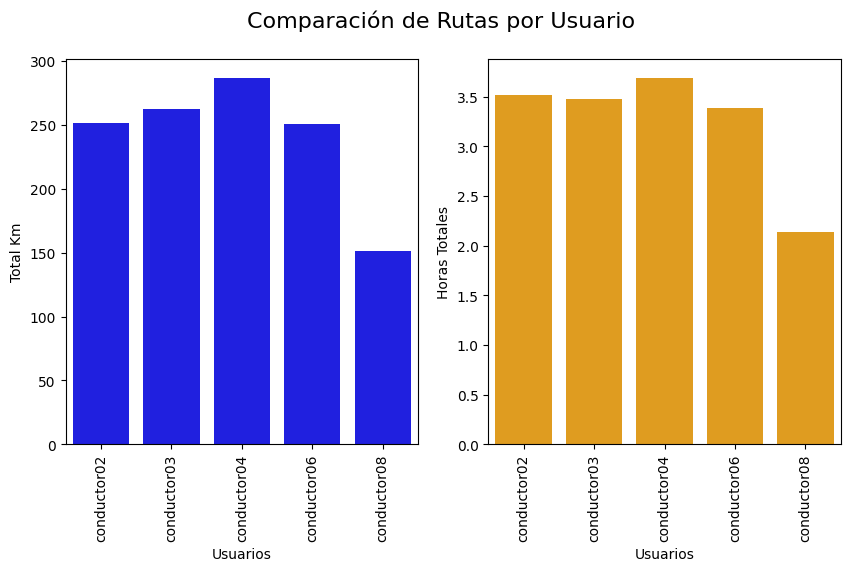

In [75]:
# Plots de Rutas solo de los  5 usuarios
rutas_users['num_conductor'] = rutas_users['usuario'].str.extract('(\d+)').astype(int)
rutas_users_ordenado = rutas_users.sort_values('num_conductor')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=rutas_users_ordenado, x='usuario', y='total_km', color='blue', ax=axes[0], errorbar=None)
axes[0].set_xlabel('Usuarios')
axes[0].set_ylabel('Total Km')
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(data=rutas_users_ordenado, x='usuario', y='horas_totales', color='orange', ax=axes[1], errorbar=None)
axes[1].set_xlabel('Usuarios')
axes[1].set_ylabel('Horas Totales')
axes[1].tick_params(axis='x', rotation=90)


plt.suptitle('Comparación de Rutas por Usuario', fontsize=16);


In [76]:
kmruta = rutas['total_km']
kmruta

0    287.170
1    250.477
2    262.755
3    251.858
4    151.574
Name: total_km, dtype: float64

#### Tickets

+ Asociamos un ticket con una ruta y un conductor

In [77]:
tickets = pd.read_csv(path + "tickets_combustible_euskadi_2022-2025.csv")
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe,Latitud,Longitud
0,12/02/2022 0:00:00,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)",Gases licuados del petróleo,5,58.0,160,286.690037,43.252778,-2.021972
1,29/07/2023 0:00:00,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)",Gasolina 95 E5 Premium,10,272.0,760,972.040000,43.240944,-2.879028
2,16/01/2023 0:00:00,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)",Gas Natural Licuado,4,313.0,1010,1809.730861,43.303444,-3.004222
3,12/08/2022 0:00:00,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)",Gasolina 95 E5,9,189.0,590,1039.347678,43.280111,-2.495722
4,19/10/2023 0:00:00,Biodiesel,1.404936,"(43.166722, -2.58525)",Biodiesel,1,133.0,810,1137.998416,43.166722,-2.585250
...,...,...,...,...,...,...,...,...,...,...,...
366741,22/05/2022 0:00:00,Gas Natural Licuado,1.529000,"(43.238139, -3.355694)",Gas Natural Licuado,4,180.0,1340,2048.860000,43.238139,-3.355694
366742,28/09/2024 0:00:00,Bioetanol,1.791000,"(43.295417, -1.899194)",Bioetanol,2,267.0,1420,2543.220000,43.295417,-1.899194
366743,03/01/2023 0:00:00,Gasolina 98 E5,1.404936,"(42.859278, -2.661694)",Gasolina 98 E5,11,54.0,1030,1447.084405,42.859278,-2.661694
366744,17/05/2023 0:00:00,Gas Natural Licuado,1.209000,"(43.339417, -1.763778)",Gas Natural Licuado,4,294.0,200,241.800000,43.339417,-1.763778


In [78]:
#La columna Fecha la paso a formato datetime
tickets['Fecha'] = pd.to_datetime(tickets['Fecha'], format='%d/%m/%Y %H:%M:%S')

#Creo las columnas de año, mes y dia
tickets['Año'] = tickets['Fecha'].dt.year
tickets['Mes'] = tickets['Fecha'].dt.month
tickets['Día'] = tickets['Fecha'].dt.day

In [79]:
#Añadimos de rutas las columnas de total_km, matriculas y user_label
tickets['total_km'] = random.choices(rutas_users_ordenado['total_km'].tolist(), k=len(tickets))
tickets['matricula'] = random.choices(rutas_users_ordenado['matricula'].tolist(), k=len(tickets))
tickets['usuario'] = random.choices(rutas_users_ordenado['usuario'].tolist(), k=len(tickets))
tickets['horas_totales'] = random.choices(rutas_users_ordenado['horas_totales'].tolist(), k=len(tickets))

In [80]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,id_ES,Litros,Importe,Latitud,Longitud,Año,Mes,Día,total_km,matricula,usuario,horas_totales
0,2022-02-12,Gases licuados del petróleo,1.791813,"(43.252778, -2.021972)",Gases licuados del petróleo,5,58.0,160,286.690037,43.252778,-2.021972,2022,2,12,287.170,0000 AAA,conductor03,3.514722
1,2023-07-29,Gasolina 95 E5 Premium,1.279000,"(43.240944, -2.879028)",Gasolina 95 E5 Premium,10,272.0,760,972.040000,43.240944,-2.879028,2023,7,29,287.170,0001 AAA,conductor08,3.386667
2,2023-01-16,Gas Natural Licuado,1.791813,"(43.303444, -3.004222)",Gas Natural Licuado,4,313.0,1010,1809.730861,43.303444,-3.004222,2023,1,16,251.858,0003 AAA,conductor02,3.479167
3,2022-08-12,Gasolina 95 E5,1.761606,"(43.280111, -2.495722)",Gasolina 95 E5,9,189.0,590,1039.347678,43.280111,-2.495722,2022,8,12,287.170,0000 AAA,conductor03,3.386667
4,2023-10-19,Biodiesel,1.404936,"(43.166722, -2.58525)",Biodiesel,1,133.0,810,1137.998416,43.166722,-2.585250,2023,10,19,251.858,0002 AAA,conductor03,3.693056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,2022-05-22,Gas Natural Licuado,1.529000,"(43.238139, -3.355694)",Gas Natural Licuado,4,180.0,1340,2048.860000,43.238139,-3.355694,2022,5,22,262.755,0001 AAA,conductor03,3.386667
366742,2024-09-28,Bioetanol,1.791000,"(43.295417, -1.899194)",Bioetanol,2,267.0,1420,2543.220000,43.295417,-1.899194,2024,9,28,287.170,0003 AAA,conductor02,3.479167
366743,2023-01-03,Gasolina 98 E5,1.404936,"(42.859278, -2.661694)",Gasolina 98 E5,11,54.0,1030,1447.084405,42.859278,-2.661694,2023,1,3,250.477,0000 AAA,conductor03,3.386667
366744,2023-05-17,Gas Natural Licuado,1.209000,"(43.339417, -1.763778)",Gas Natural Licuado,4,294.0,200,241.800000,43.339417,-1.763778,2023,5,17,262.755,0000 AAA,conductor02,3.693056


#### Vehículos

+ Agrupamos un vehiculo a un usuario-ruta y consideramos el tipo de combustible usado por un vehiculo de la flota

In [81]:
flotavehiculos = pd.read_csv(path + "df_vehiculos_procesado_kw.csv", sep=',', decimal=',', encoding='utf-8')
flotavehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
2,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
3,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0005 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
15780,2191 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Core, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15781,2192 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Plus, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15782,2193 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Ultimate, ...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15783,2194 AAC,"Volvo XC90 Recharge, AWD, Inscription, Inscrip...",A,3.3,2.5,57.0,75.7,Híbridos enchufables,NaN,NaN


In [82]:
mergetickets_vehiculos = pd.merge(flotavehiculos, tickets, left_on='Matricula', right_on='matricula', how='inner')
mergetickets_vehiculos.head()

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Importe,Latitud,Longitud,Año,Mes,Día,total_km,matricula,usuario,horas_totales
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,286.690037,43.252778,-2.021972,2022,2,12,287.170,0000 AAA,conductor03,3.514722
1,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1039.347678,43.280111,-2.495722,2022,8,12,287.170,0000 AAA,conductor03,3.386667
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,2483.864791,42.842833,-2.682278,2022,12,8,262.755,0000 AAA,conductor03,3.514722
3,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1592.201391,43.345250,-2.503472,2023,2,2,151.574,0000 AAA,conductor02,3.693056
4,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,898.419180,43.241444,-2.259444,2023,10,30,151.574,0000 AAA,conductor03,2.139444


In [83]:
columns = ['Coordenadas', 'nombre_carburante', 'matricula']
mergetickets_vehiculos.drop(columns= columns, inplace=True)


In [84]:
mergetickets_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Litros,Importe,Latitud,Longitud,Año,Mes,Día,total_km,usuario,horas_totales
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,160,286.690037,43.252778,-2.021972,2022,2,12,287.170,conductor03,3.514722
1,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,590,1039.347678,43.280111,-2.495722,2022,8,12,287.170,conductor03,3.386667
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1410,2483.864791,42.842833,-2.682278,2022,12,8,262.755,conductor03,3.514722
3,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,910,1592.201391,43.345250,-2.503472,2023,2,2,151.574,conductor02,3.693056
4,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,510,898.419180,43.241444,-2.259444,2023,10,30,151.574,conductor03,2.139444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293476,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,1280,1845.330404,43.274111,-2.129028,2023,3,12,262.755,conductor04,3.514722
293477,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,180,320.220000,43.345250,-2.503472,2022,1,31,250.477,conductor08,3.693056
293478,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,1390,1952.861479,43.189667,-2.258778,2022,3,4,251.858,conductor04,3.693056
293479,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,1420,2543.220000,43.295417,-1.899194,2024,9,28,287.170,conductor02,3.479167


In [85]:
mergetickets_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293481 entries, 0 to 293480
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Matricula                 293481 non-null  object        
 1   Modelo                    293481 non-null  object        
 2   Clasificación Energética  293481 non-null  object        
 3    Consumo MIN              293481 non-null  object        
 4    Consumo MAX              293481 non-null  object        
 5    Emisiones MIN (gCO2/km)  293481 non-null  object        
 6    Emisiones MAX (gCO2/km)  293481 non-null  object        
 7    Motorización             293481 non-null  object        
 8   kw_minimo                 220411 non-null  object        
 9   kw_maximo                 220411 non-null  object        
 10  Fecha                     293481 non-null  datetime64[ns]
 11  TipoCarburante            293481 non-null  object        
 12  Pr

In [86]:
mergetickets_vehiculos.columns

Index(['Matricula', 'Modelo', 'Clasificación Energética', ' Consumo MIN',
       ' Consumo MAX', ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)',
       ' Motorización', 'kw_minimo', 'kw_maximo', 'Fecha', 'TipoCarburante',
       'Precio por Litro', 'id_carburante', 'id_ES', 'Litros', 'Importe',
       'Latitud', 'Longitud', 'Año', 'Mes', 'Día', 'total_km', 'usuario',
       'horas_totales'],
      dtype='object')

In [87]:
columnas_excluir = ['Matricula', 'Modelo', 'Clasificación Energética',' Motorización', 'Fecha', 'TipoCarburante', 
                     'id_carburante', 'id_ES', 'Año', 'Mes', 'Día', 'total_km', 'usuario']

for col in mergetickets_vehiculos.columns:
    if mergetickets_vehiculos[col].dtype == 'object' and col not in columnas_excluir:
        # to_numeric es más seguro porque maneja errores automáticamente
        mergetickets_vehiculos[col] = pd.to_numeric(mergetickets_vehiculos[col], errors='coerce')

mergetickets_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293481 entries, 0 to 293480
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Matricula                 293481 non-null  object        
 1   Modelo                    293481 non-null  object        
 2   Clasificación Energética  293481 non-null  object        
 3    Consumo MIN              293481 non-null  float64       
 4    Consumo MAX              293481 non-null  float64       
 5    Emisiones MIN (gCO2/km)  293481 non-null  float64       
 6    Emisiones MAX (gCO2/km)  293481 non-null  float64       
 7    Motorización             293481 non-null  object        
 8   kw_minimo                 220411 non-null  float64       
 9   kw_maximo                 220411 non-null  float64       
 10  Fecha                     293481 non-null  datetime64[ns]
 11  TipoCarburante            293481 non-null  object        
 12  Pr

In [88]:
#Gasto en litros e importe por tipo de carburante y año
gasto_carburante = mergetickets_vehiculos.groupby(['Año','Mes', 'TipoCarburante', 'total_km', 'Matricula', 'usuario']).agg({'Litros': 'sum', 'Importe': 'sum', ' Consumo MIN': 'mean', ' Consumo MAX': 'mean'}).reset_index()
gasto_carburante

,Año,Mes,TipoCarburante,total_km,Matricula,usuario,Litros,Importe,Consumo MIN,Consumo MAX
0,2022,1,Biodiesel,151.574,0000 AAA,conductor02,9000,12837.261230,0.4,6.4
1,2022,1,Biodiesel,151.574,0000 AAA,conductor03,9480,14669.355446,0.4,6.4
2,2022,1,Biodiesel,151.574,0000 AAA,conductor04,10520,14492.435375,0.4,6.4
3,2022,1,Biodiesel,151.574,0000 AAA,conductor06,9210,14597.840490,0.4,6.4
4,2022,1,Biodiesel,151.574,0000 AAA,conductor08,6780,9721.469639,0.4,6.4
...,...,...,...,...,...,...,...,...,...,...
29684,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor02,8760,13957.881903,7.1,7.5
29685,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor03,1690,2892.914984,7.1,7.5
29686,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor04,7480,12488.332224,7.1,7.5
29687,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor06,6270,9292.640751,7.1,7.5


+ Cálculo de consumo según el tipo de vehículo

In [89]:
gasto_carburante['mean_consumo'] = (gasto_carburante[' Consumo MIN'] + gasto_carburante[' Consumo MAX']) / 2
gasto_carburante.drop(columns=[' Consumo MIN', ' Consumo MAX'], inplace=True)
gasto_carburante

,Año,Mes,TipoCarburante,total_km,Matricula,usuario,Litros,Importe,mean_consumo
0,2022,1,Biodiesel,151.574,0000 AAA,conductor02,9000,12837.261230,3.4
1,2022,1,Biodiesel,151.574,0000 AAA,conductor03,9480,14669.355446,3.4
2,2022,1,Biodiesel,151.574,0000 AAA,conductor04,10520,14492.435375,3.4
3,2022,1,Biodiesel,151.574,0000 AAA,conductor06,9210,14597.840490,3.4
4,2022,1,Biodiesel,151.574,0000 AAA,conductor08,6780,9721.469639,3.4
...,...,...,...,...,...,...,...,...,...
29684,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor02,8760,13957.881903,7.3
29685,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor03,1690,2892.914984,7.3
29686,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor04,7480,12488.332224,7.3
29687,2024,12,Gasolina 98 E5,287.170,0003 AAA,conductor06,6270,9292.640751,7.3


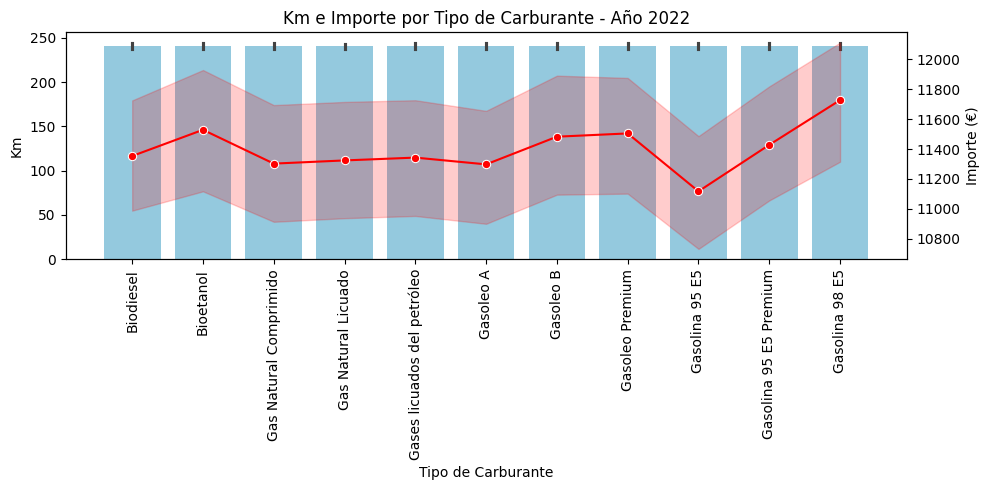

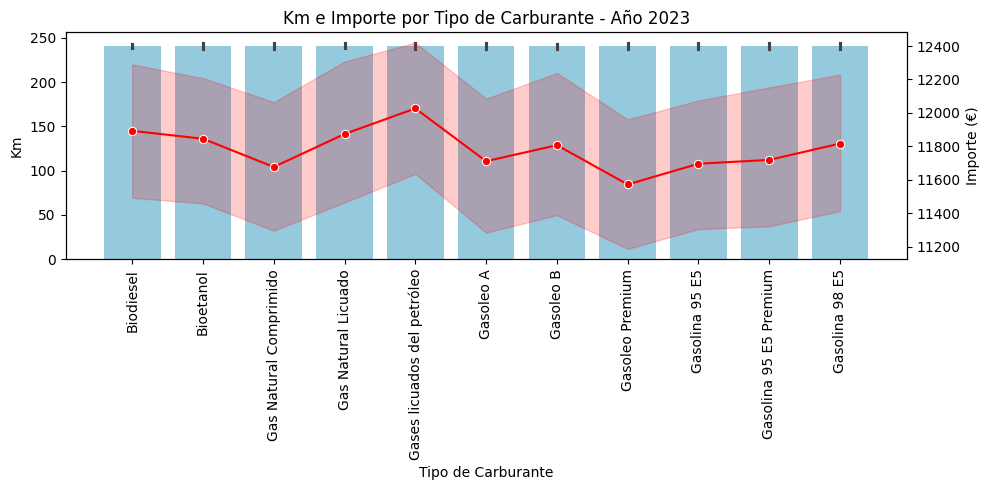

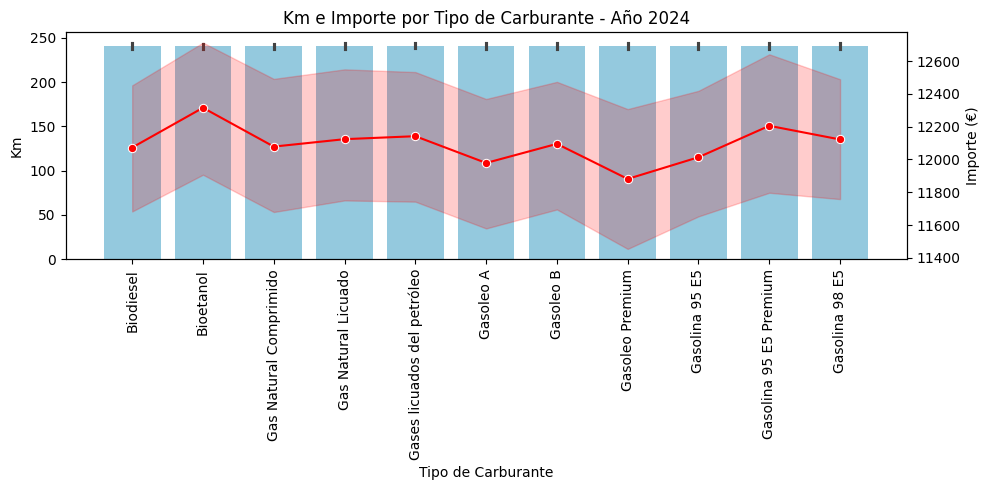

In [90]:
# Gráfico combinado de km (barras) e importe (línea) por tipo de carburante y año
for año in gasto_carburante['Año'].unique():
    df_año = gasto_carburante[gasto_carburante['Año'] == año]
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Barras: Km por tipo de carburante
    sns.barplot(data=df_año, x='TipoCarburante', y='total_km', ax=ax1, color='skyblue')
    ax1.set_ylabel('Km')
    ax1.set_xlabel('Tipo de Carburante')
    ax1.set_title(f'Km e Importe por Tipo de Carburante - Año {año}')
    ax1.tick_params(axis='x', rotation=90)

    # Línea: Importe total por tipo de carburante
    ax2 = ax1.twinx()
    sns.lineplot(data=df_año, x='TipoCarburante', y='Importe', ax=ax2, color='red', marker='o')
    ax2.set_ylabel('Importe (€)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    plt.tight_layout()
    plt.show()
    

In [91]:
#Grafico del año 2024 los gastos por tipo de carburante, litros e importe
df_2024 = mergetickets_vehiculos[mergetickets_vehiculos['Año'] == 2024]
df_2024

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Litros,Importe,Latitud,Longitud,Año,Mes,Día,total_km,usuario,horas_totales
8,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,750,1397.878590,42.870861,-2.312056,2024,7,24,250.477,conductor04,3.693056
10,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,350,612.385150,42.753194,-2.477917,2024,5,11,151.574,conductor08,3.693056
13,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,290,275.726218,43.311639,-3.024278,2024,7,13,287.170,conductor04,2.139444
26,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,770,1169.630000,43.298528,-3.003167,2024,3,4,287.170,conductor03,3.693056
30,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,120,162.837822,43.380556,-2.959750,2024,2,28,287.170,conductor06,3.386667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293465,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,1070,2031.930000,43.354389,-2.839833,2024,10,24,251.858,conductor06,3.693056
293467,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,1050,1431.150000,43.232028,-2.000389,2024,11,9,250.477,conductor08,3.386667
293469,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,1180,1701.163966,43.145222,-2.071278,2024,9,17,151.574,conductor03,3.693056
293470,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0,...,450,787.352336,43.337167,-1.752944,2024,3,23,251.858,conductor02,3.693056


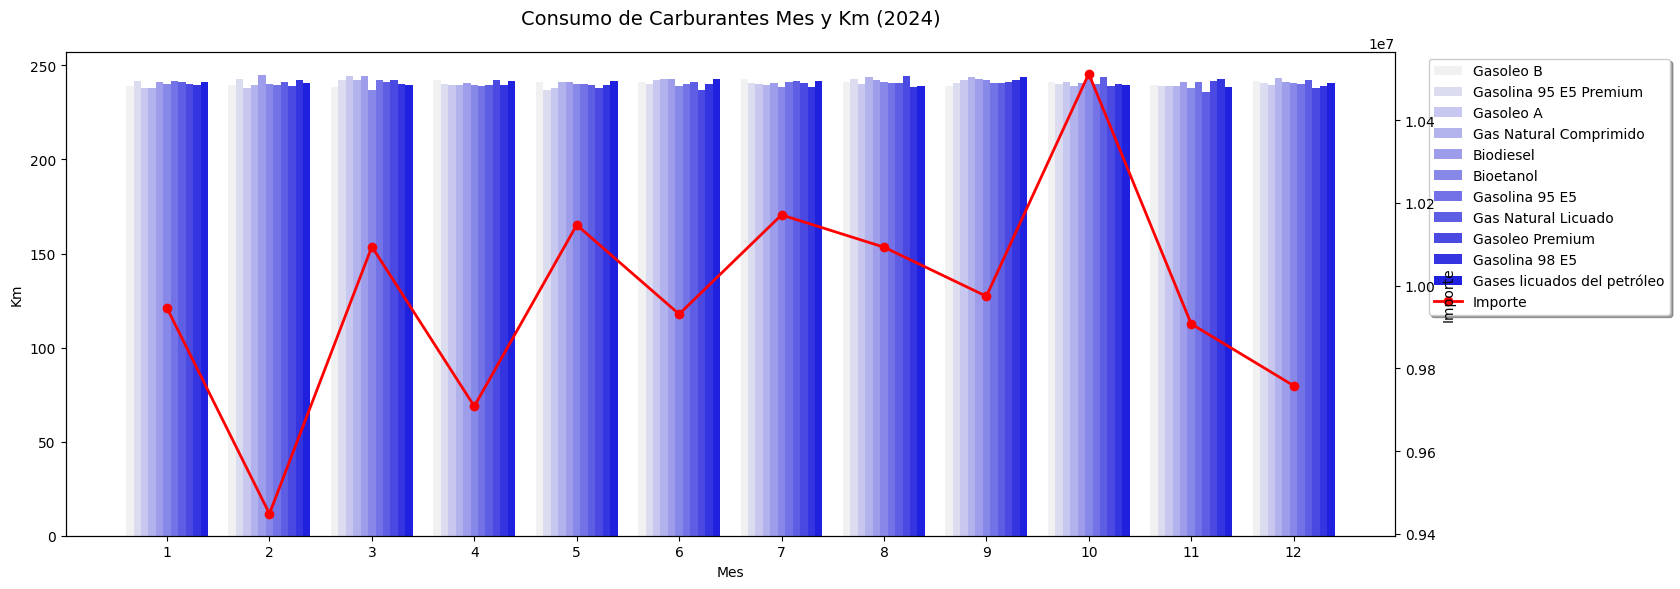

In [92]:
plt.figure(figsize=(14, 6))

ax1 = plt.gca()
sns.barplot(data=df_2024, x='Mes', y='total_km',hue='TipoCarburante', errorbar=None, palette='light:blue',ax=ax1)


ax2 = ax1.twinx()

#  datos por mes y asegurarse de que incluya todos los meses desde 1
df_importe_mes = df_2024.groupby('Mes', as_index=False)['Importe'].sum()


line_plot = ax2.plot(
    df_importe_mes['Mes'] - 1,  # Ajustar posición para alinear con las barras (índice 0-based)
    df_importe_mes['Importe'], 
    color='red', 
    marker='o',
    linewidth=2,
    markersize=6,
    label='Importe'
)


plt.title('Consumo de Carburantes Mes y Km (2024)', fontsize=14, pad=20)
ax1.set_xlabel('Mes')
ax1.set_ylabel('Km')
ax2.set_ylabel('Importe')


handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()


ax1.get_legend().remove()


ax1.legend(handles1 + handles2, labels1 + labels2, 
          loc='upper left', bbox_to_anchor=(1.02, 1), 
          frameon=True, fancybox=True, shadow=True)


plt.tight_layout()
plt.subplots_adjust(right=1)  #  espacio a la derecha para la leyenda

plt.show()


#### Tipo de Carburante

In [93]:
combustible = pd.read_csv(path + "df_combustible_precios_euskadi_2022-2025.csv")


In [94]:
combustible['Fecha'] = pd.to_datetime(combustible['Fecha'], format='%d/%m/%Y %H:%M:%S')

#Creo las columnas de año, mes y dia
combustible['Año'] = combustible['Fecha'].dt.year
combustible['Mes'] = combustible['Fecha'].dt.month
combustible['Día'] = combustible['Fecha'].dt.day

In [95]:
combustible_group = combustible.groupby(['Año', 'Mes', 'nombre_carburante']).agg({ 'precio': 'mean', 'energia_kWh': 'mean'}).reset_index()
combustible_group

,Año,Mes,nombre_carburante,precio,energia_kWh
0,2022,1,Biodiesel,1.786852,9.20
1,2022,1,Bioetanol,1.639070,5.90
2,2022,1,Gas Natural Comprimido,1.449318,13.10
3,2022,1,Gas Natural Licuado,1.411236,13.90
4,2022,1,Gases licuados del petróleo,0.938963,6.90
...,...,...,...,...,...
391,2024,12,Gasoleo B,1.331939,10.20
392,2024,12,Gasoleo Premium,1.648500,10.20
393,2024,12,Gasolina 95 E5,1.555840,9.25
394,2024,12,Gasolina 95 E5 Premium,1.749829,9.25


#### Merge de datasets

+ Cálculo del consumo y gasto 

In [96]:
mergedf = pd.merge(combustible_group, mergetickets_vehiculos, left_on=['Año', 'Mes', 'nombre_carburante'],
                   right_on=['Año', 'Mes', 'TipoCarburante'], how="inner")

In [97]:
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,...,id_carburante,id_ES,Litros,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,NaN,680,1197.892240,43.318167,-2.673417,20,262.755,conductor02,3.479167
1,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,336.0,420,789.180000,43.336611,-1.796417,12,151.574,conductor06,2.139444
2,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,161.0,750,1012.500000,43.340389,-2.994750,31,151.574,conductor08,3.479167
3,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,44.0,810,1372.950000,43.031889,-2.967611,1,151.574,conductor04,3.514722
4,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,191.0,1120,1835.769662,43.291222,-2.960417,26,151.574,conductor04,3.693056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293476,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,11,278.0,1280,2098.022471,43.304556,-1.949639,18,262.755,conductor02,3.514722
293477,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,11,49.0,920,1292.541410,42.635194,-2.849833,25,151.574,conductor03,3.514722
293478,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,11,108.0,1380,2386.020000,43.312139,-1.879528,26,262.755,conductor06,3.386667
293479,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,11,167.0,1100,1585.830816,43.315389,-3.021278,30,151.574,conductor02,3.693056


In [98]:
mergedf.columns

Index(['Año', 'Mes', 'nombre_carburante', 'precio', 'energia_kWh', 'Matricula',
       'Modelo', 'Clasificación Energética', ' Consumo MIN', ' Consumo MAX',
       ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)', ' Motorización',
       'kw_minimo', 'kw_maximo', 'Fecha', 'TipoCarburante', 'Precio por Litro',
       'id_carburante', 'id_ES', 'Litros', 'Importe', 'Latitud', 'Longitud',
       'Día', 'total_km', 'usuario', 'horas_totales'],
      dtype='object')

+ Consumo medio según el tipo de vehículo

In [99]:
mergedf['consumovehiculomean'] = (mergedf[' Consumo MIN'] + mergedf[' Consumo MAX'] / 2)  
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,...,id_ES,Litros,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales,consumovehiculomean
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,NaN,680,1197.892240,43.318167,-2.673417,20,262.755,conductor02,3.479167,3.60
1,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,336.0,420,789.180000,43.336611,-1.796417,12,151.574,conductor06,2.139444,3.60
2,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,161.0,750,1012.500000,43.340389,-2.994750,31,151.574,conductor08,3.479167,3.60
3,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,44.0,810,1372.950000,43.031889,-2.967611,1,151.574,conductor04,3.514722,3.60
4,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,191.0,1120,1835.769662,43.291222,-2.960417,26,151.574,conductor04,3.693056,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293476,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,278.0,1280,2098.022471,43.304556,-1.949639,18,262.755,conductor02,3.514722,10.85
293477,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,49.0,920,1292.541410,42.635194,-2.849833,25,151.574,conductor03,3.514722,10.85
293478,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,108.0,1380,2386.020000,43.312139,-1.879528,26,262.755,conductor06,3.386667,10.85
293479,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,...,167.0,1100,1585.830816,43.315389,-3.021278,30,151.574,conductor02,3.693056,10.85


In [100]:
mergedf = mergedf.drop(columns=['TipoCarburante', ' Consumo MIN', ' Consumo MAX'])

In [101]:
mergedf.columns

Index(['Año', 'Mes', 'nombre_carburante', 'precio', 'energia_kWh', 'Matricula',
       'Modelo', 'Clasificación Energética', ' Emisiones MIN (gCO2/km)',
       ' Emisiones MAX (gCO2/km)', ' Motorización', 'kw_minimo', 'kw_maximo',
       'Fecha', 'Precio por Litro', 'id_carburante', 'id_ES', 'Litros',
       'Importe', 'Latitud', 'Longitud', 'Día', 'total_km', 'usuario',
       'horas_totales', 'consumovehiculomean'],
      dtype='object')

In [ ]:
mergedf['consumovehiculomean'] = (mergedf[' Consumo MIN'] + mergedf[' Consumo MAX'] / 2)  
mergedf['consumo_vehiculo_Km'] = mergedf['consumovehiculomean'] * mergedf['horas_totales'] / mergedf['total_km']
mergedf.head()

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,Litros,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales,consumovehiculomean,consumo_vehiculo_Km
0,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,680,1197.892240,43.318167,-2.673417,20,262.755,conductor02,3.479167,3.6,0.047668
1,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,420,789.180000,43.336611,-1.796417,12,151.574,conductor06,2.139444,3.6,0.050813
2,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,750,1012.500000,43.340389,-2.994750,31,151.574,conductor08,3.479167,3.6,0.082633
3,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,810,1372.950000,43.031889,-2.967611,1,151.574,conductor04,3.514722,3.6,0.083477
4,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,1120,1835.769662,43.291222,-2.960417,26,151.574,conductor04,3.693056,3.6,0.087713


In [103]:
consumo_vehiculo_Km_anual= mergedf.groupby(['Año', 'nombre_carburante']).agg(km_medio=('total_km', 'mean'),consumo_anual=('consumo_vehiculo_Km', 'sum'))



In [104]:
consumo_vehiculo_Km_anual

km_medio  consumo_anual
Año  nombre_carburante                                     
2022 Biodiesel                    240.719649     586.914899
     Bioetanol                    240.635218     597.633767
     Gas Natural Comprimido       240.335716     588.412456
     Gas Natural Licuado          241.077855     578.744210
     Gases licuados del petróleo  240.905637     593.067259
     Gasoleo A                    241.728473     579.549287
     Gasoleo B                    241.145349     593.848784
     Gasoleo Premium              241.269524     591.154231
     Gasolina 95 E5               240.877901     582.996539
     Gasolina 95 E5 Premium       240.854711     596.688871
     Gasolina 98 E5               241.938747     601.438270
2023 Biodiesel                    240.294320     607.896993
     Bioetanol                    241.294916     621.525353
     Gas Natural Comprimido       241.203009     617.152925
     Gas Natural Licuado          241.575008     602.451264
     Gases licuados del petróleo  240.090489     621.315265
     Gasoleo A                    240.152172     607.755049
     Gasoleo B                    241.255910     605.201297
     Gasoleo Premium              241.011410     599.631120
     Gasolina 95 E5               240.417521     613.816640
     Gasolina 95 E5 Premium       241.422267     616.882030
     Gasolina 98 E5               241.583423     613.070845
2024 Biodiesel                    241.910345     622.996790
     Bioetanol                    239.971512     645.296393
     Gas Natural Comprimido       240.967709     627.000559
     Gas Natural Licuado          240.735104     636.965750
     Gases licuados del petróleo  240.923297     636.798166
     Gasoleo A                    240.241029     613.023368
     Gasoleo B                    240.629365     636.977042
     Gasoleo Premium              240.244404     632.924624
     Gasolina 95 E5               240.599248     630.659160
     Gasolina 95 E5 Premium       240.702988     635.891239
     Gasolina 98 E5               240.155710     638.124026

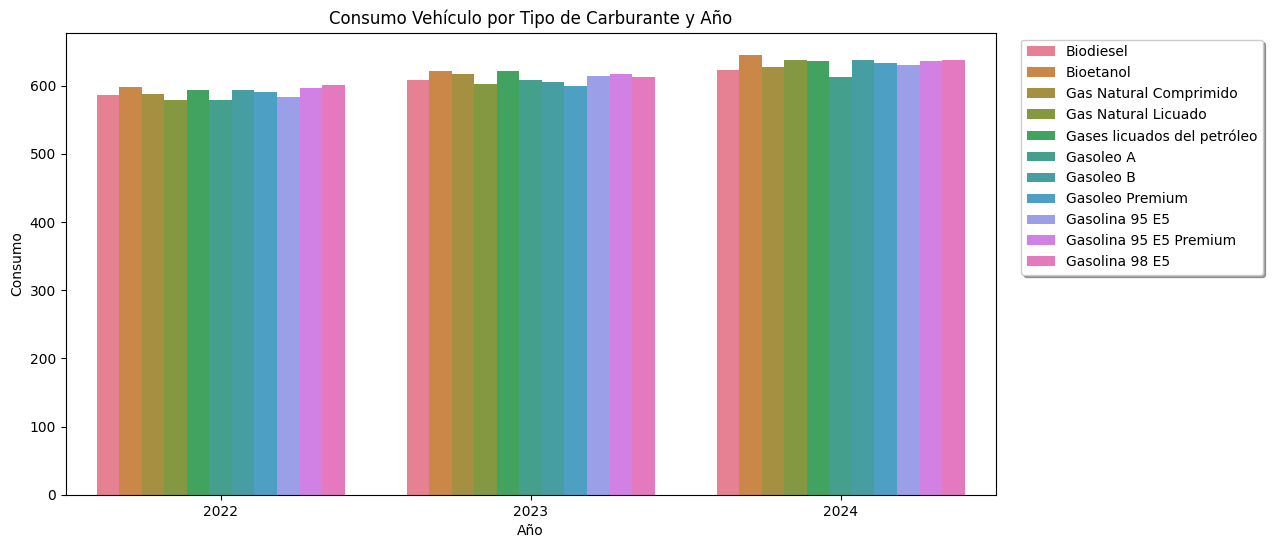

In [107]:
#Plot del coste energetico por tipo de carburante y año
plt.figure(figsize=(12, 6))
sns.barplot(data=consumo_vehiculo_Km_anual, x='Año', y='consumo_anual', hue='nombre_carburante')
plt.title('Consumo Vehículo por Tipo de Carburante y Año')
plt.xlabel('Año')
plt.ylabel('Consumo')
plt.legend(title='Tipo de Carburante')
plt.legend( 
          loc='upper left', bbox_to_anchor=(1.02, 1), 
          frameon=True, fancybox=True, shadow=True)
plt.show()


In [108]:
consumo_vehiculo_Km_anual

km_medio  consumo_anual
Año  nombre_carburante                                     
2022 Biodiesel                    240.719649     586.914899
     Bioetanol                    240.635218     597.633767
     Gas Natural Comprimido       240.335716     588.412456
     Gas Natural Licuado          241.077855     578.744210
     Gases licuados del petróleo  240.905637     593.067259
     Gasoleo A                    241.728473     579.549287
     Gasoleo B                    241.145349     593.848784
     Gasoleo Premium              241.269524     591.154231
     Gasolina 95 E5               240.877901     582.996539
     Gasolina 95 E5 Premium       240.854711     596.688871
     Gasolina 98 E5               241.938747     601.438270
2023 Biodiesel                    240.294320     607.896993
     Bioetanol                    241.294916     621.525353
     Gas Natural Comprimido       241.203009     617.152925
     Gas Natural Licuado          241.575008     602.451264
     Gases licuados del petróleo  240.090489     621.315265
     Gasoleo A                    240.152172     607.755049
     Gasoleo B                    241.255910     605.201297
     Gasoleo Premium              241.011410     599.631120
     Gasolina 95 E5               240.417521     613.816640
     Gasolina 95 E5 Premium       241.422267     616.882030
     Gasolina 98 E5               241.583423     613.070845
2024 Biodiesel                    241.910345     622.996790
     Bioetanol                    239.971512     645.296393
     Gas Natural Comprimido       240.967709     627.000559
     Gas Natural Licuado          240.735104     636.965750
     Gases licuados del petróleo  240.923297     636.798166
     Gasoleo A                    240.241029     613.023368
     Gasoleo B                    240.629365     636.977042
     Gasoleo Premium              240.244404     632.924624
     Gasolina 95 E5               240.599248     630.659160
     Gasolina 95 E5 Premium       240.702988     635.891239
     Gasolina 98 E5               240.155710     638.124026

# MODELO 1: Predicción del consumo

In [119]:
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,Litros,Importe,Latitud,Longitud,Día,total_km,usuario,horas_totales,consumovehiculomean,consumo_vehiculo_Km
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,680,1197.892240,43.318167,-2.673417,20,262.755,conductor02,3.479167,3.60,0.047668
1,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,420,789.180000,43.336611,-1.796417,12,151.574,conductor06,2.139444,3.60,0.050813
2,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,750,1012.500000,43.340389,-2.994750,31,151.574,conductor08,3.479167,3.60,0.082633
3,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,810,1372.950000,43.031889,-2.967611,1,151.574,conductor04,3.514722,3.60,0.083477
4,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,1120,1835.769662,43.291222,-2.960417,26,151.574,conductor04,3.693056,3.60,0.087713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293476,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,198.7,207.7,...,1280,2098.022471,43.304556,-1.949639,18,262.755,conductor02,3.514722,10.85,0.145134
293477,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,198.7,207.7,...,920,1292.541410,42.635194,-2.849833,25,151.574,conductor03,3.514722,10.85,0.251592
293478,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,198.7,207.7,...,1380,2386.020000,43.312139,-1.879528,26,262.755,conductor06,3.386667,10.85,0.139846
293479,2024,12,Gasolina 98 E5,1.782658,9.25,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,198.7,207.7,...,1100,1585.830816,43.315389,-3.021278,30,151.574,conductor02,3.693056,10.85,0.264357


In [111]:
dfcopy = mergedf.copy()

In [112]:
dfcopy.columns

Index(['Año', 'Mes', 'nombre_carburante', 'precio', 'energia_kWh', 'Matricula',
       'Modelo', 'Clasificación Energética', ' Emisiones MIN (gCO2/km)',
       ' Emisiones MAX (gCO2/km)', ' Motorización', 'kw_minimo', 'kw_maximo',
       'Fecha', 'Precio por Litro', 'id_carburante', 'id_ES', 'Litros',
       'Importe', 'Latitud', 'Longitud', 'Día', 'total_km', 'usuario',
       'horas_totales', 'consumovehiculomean', 'consumo_vehiculo_Km'],
      dtype='object')

In [115]:
object_columns = dfcopy.select_dtypes(include='object').columns.tolist()
print(object_columns)

['nombre_carburante', 'Matricula', 'Modelo', 'Clasificación Energética', ' Motorización', 'usuario']


In [120]:
encoder = LabelEncoder()
col = dfcopy.columns

for col in dfcopy.select_dtypes(include='object').columns.tolist():
    dfcopy['enc_' + col] = encoder.fit_transform(dfcopy[col])


dfcopy['enc_fecha'] = encoder.fit_transform(dfcopy['Fecha'].astype(str))

dfcopy.head()


,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,horas_totales,consumovehiculomean,consumo_vehiculo_Km,enc_nombre_carburante,enc_Matricula,enc_Modelo,enc_Clasificación Energética,enc_ Motorización,enc_usuario,enc_fecha
0,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,3.479167,3.6,0.047668,0,0,1,0,0,0,19
1,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,2.139444,3.6,0.050813,0,0,1,0,0,3,11
2,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,3.479167,3.6,0.082633,0,0,1,0,0,4,30
3,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,3.514722,3.6,0.083477,0,0,1,0,0,2,0
4,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,3.693056,3.6,0.087713,0,0,1,0,0,2,25


In [121]:
columns = ['nombre_carburante', 'Matricula', 'Modelo', 'Clasificación Energética',
' Motorización', 'usuario', 'Fecha']

df= dfcopy.drop(columns = columns)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293481 entries, 0 to 293480
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Año                           293481 non-null  int32  
 1   Mes                           293481 non-null  int32  
 2   precio                        293481 non-null  float64
 3   energia_kWh                   293481 non-null  float64
 4    Emisiones MIN (gCO2/km)      293481 non-null  float64
 5    Emisiones MAX (gCO2/km)      293481 non-null  float64
 6   kw_minimo                     220411 non-null  float64
 7   kw_maximo                     220411 non-null  float64
 8   Precio por Litro              293481 non-null  float64
 9   id_carburante                 293481 non-null  int64  
 10  id_ES                         286280 non-null  float64
 11  Litros                        293481 non-null  int64  
 12  Importe                       293481 non-nul

In [123]:
df.isna().sum()

Año                                 0
Mes                                 0
precio                              0
energia_kWh                         0
 Emisiones MIN (gCO2/km)            0
 Emisiones MAX (gCO2/km)            0
kw_minimo                       73070
kw_maximo                       73070
Precio por Litro                    0
id_carburante                       0
id_ES                            7201
Litros                              0
Importe                             0
Latitud                             0
Longitud                            0
Día                                 0
total_km                            0
horas_totales                       0
consumovehiculomean                 0
consumo_vehiculo_Km                 0
enc_nombre_carburante               0
enc_Matricula                       0
enc_Modelo                          0
enc_Clasificación Energética        0
enc_ Motorización                   0
enc_usuario                         0
enc_fecha   

In [124]:
df = df.dropna()

In [125]:
df.isna().sum()

Año                             0
Mes                             0
precio                          0
energia_kWh                     0
 Emisiones MIN (gCO2/km)        0
 Emisiones MAX (gCO2/km)        0
kw_minimo                       0
kw_maximo                       0
Precio por Litro                0
id_carburante                   0
id_ES                           0
Litros                          0
Importe                         0
Latitud                         0
Longitud                        0
Día                             0
total_km                        0
horas_totales                   0
consumovehiculomean             0
consumo_vehiculo_Km             0
enc_nombre_carburante           0
enc_Matricula                   0
enc_Modelo                      0
enc_Clasificación Energética    0
enc_ Motorización               0
enc_usuario                     0
enc_fecha                       0
dtype: int64

In [126]:
Target = df['consumo_vehiculo_Km']
Features = df.drop(columns = 'consumo_vehiculo_Km')

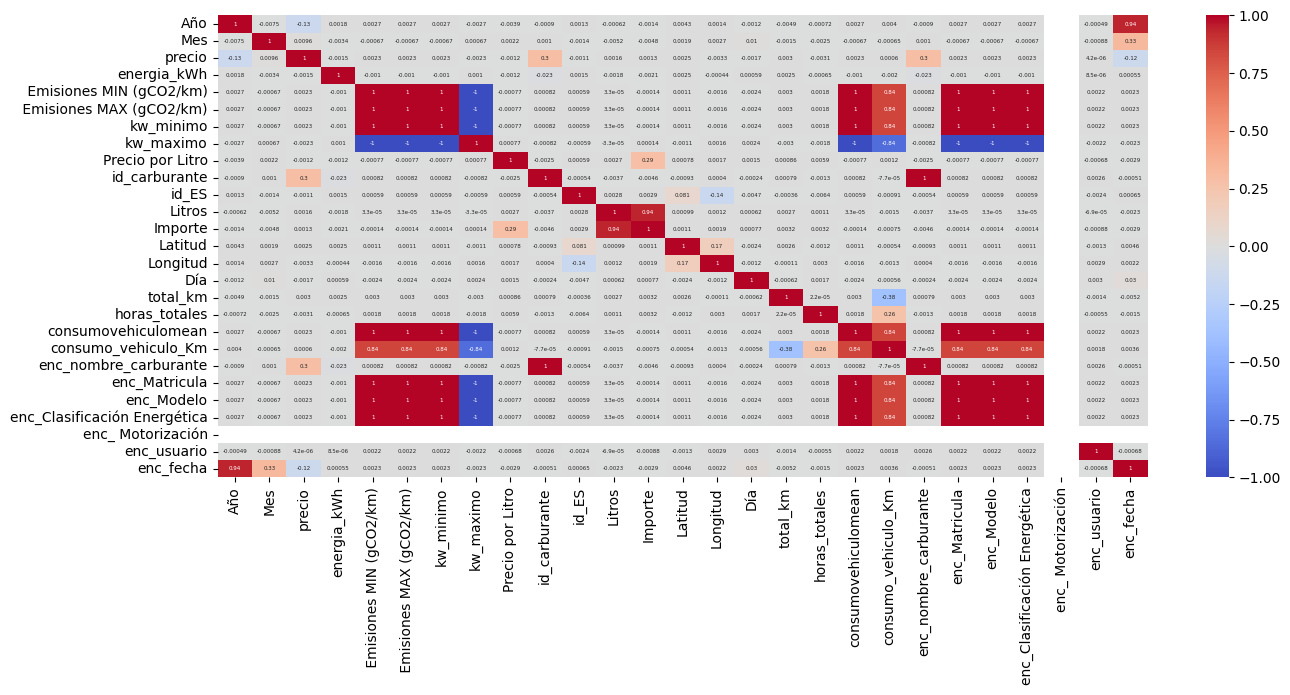

In [128]:
#Heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot_kws={'fontsize': 4},vmin=-1, vmax=1, cmap ="coolwarm", annot=True);

In [130]:

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20, random_state=42, shuffle=True)

print('X_train_shape: ', X_train.shape)
print('y_train_shape: ', y_train.shape)
print('\nX_test_shape: ', X_test.shape)
print('y_test_shape: ', y_test.shape)


print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
names = Features.columns
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Features, Target)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
feature_importance_df = pd.DataFrame(scores, columns=['Score', 'Feature'])
print(feature_importance_df)

# Define models to compare (no encoding needed since data is already encoded)
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR())
    ])
}

# Compare models using cross-validation
print("\n=== MODEL COMPARISON RESULTS ===")
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    scores = cross_validate(model, Features, Target, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = {
        'R2_mean': scores['test_r2'].mean(),
        'R2_std': scores['test_r2'].std(),
        'MSE_mean': -scores['test_neg_mean_squared_error'].mean(),
        'MSE_std': scores['test_neg_mean_squared_error'].std(),
        'MAE_mean': -scores['test_neg_mean_absolute_error'].mean(),
        'MAE_std': scores['test_neg_mean_absolute_error'].std()
    }

# Display results in a nice format
results_df = pd.DataFrame(results).T.round(4)
print("\n=== FINAL RESULTS SUMMARY ===")
print(results_df)

# Find best model based on R2 score
best_model = results_df['R2_mean'].idxmax()
best_r2 = results_df.loc[best_model, 'R2_mean']
print(f"\nBest Model: {best_model} with R² = {best_r2}")

# Show top 10 most important features
print("\n=== TOP 10 MOST IMPORTANT FEATURES ===")
print(feature_importance_df.head(10))

X_train_shape:  (172056, 26)
y_train_shape:  (172056,)

X_test_shape:  (43015, 26)
y_test_shape:  (43015,)

=== FEATURE IMPORTANCE ANALYSIS ===
     Score                       Feature
0   0.6627                     kw_maximo
1   0.1950                      total_km
2   0.0925                 horas_totales
3   0.0143  enc_Clasificación Energética
4   0.0143       Emisiones MAX (gCO2/km)
5   0.0071                    enc_Modelo
6   0.0071           consumovehiculomean
7   0.0071       Emisiones MIN (gCO2/km)
8   0.0000                        precio
9   0.0000                     kw_minimo
10  0.0000                 id_carburante
11  0.0000                         id_ES
12  0.0000                   energia_kWh
13  0.0000                   enc_usuario
14  0.0000         enc_nombre_carburante
15  0.0000                     enc_fecha
16  0.0000                 enc_Matricula
17  0.0000             enc_ Motorización
18  0.0000              Precio por Litro
19  0.0000                          

+ Nos quedamos con un linear regressor que tiene Rscore de 0.92 porque el RF nos da overfitting (Rscore = 1)
+ Las features importance son el consumo  del vehiculo y los km totales

In [132]:
# Save the trained model
import os
import joblib

# Create models directory
os.makedirs('../models', exist_ok=True)

# Keep only the top 2 most important features
top_features = ['kw_maximo', 'total_km']
Features_top = Features[top_features]

# Train the Linear Regression model on the reduced dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
best_model.fit(Features_top, Target)

# Save the best model (Linear Regression pipeline)
joblib.dump(best_model, '../models/best_model.pkl')

# Also save the feature columns for reference
feature_cols = list(Features_top.columns)
joblib.dump(feature_cols, '../models/feature_columns.pkl')

print(f"\nBest model (Linear Regression) with top 2 features saved successfully.")
print(f"Features used: {feature_cols}")
print(f"Feature columns saved for reference.")




Best model (Linear Regression) with top 2 features saved successfully.
Features used: ['kw_maximo', 'total_km']
Feature columns saved for reference.


# MODELO 2: Predicción del gasto mensual

In [133]:
df.columns

Index(['Año', 'Mes', 'precio', 'energia_kWh', ' Emisiones MIN (gCO2/km)',
       ' Emisiones MAX (gCO2/km)', 'kw_minimo', 'kw_maximo',
       'Precio por Litro', 'id_carburante', 'id_ES', 'Litros', 'Importe',
       'Latitud', 'Longitud', 'Día', 'total_km', 'horas_totales',
       'consumovehiculomean', 'consumo_vehiculo_Km', 'enc_nombre_carburante',
       'enc_Matricula', 'enc_Modelo', 'enc_Clasificación Energética',
       'enc_ Motorización', 'enc_usuario', 'enc_fecha'],
      dtype='object')

In [134]:
# Target and Features

Target = df['precio']
Features = df.drop(columns = ['precio', 'id_carburante'])

# Split the data (data is already encoded)
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20, random_state=42, shuffle=True)

print('X_train_shape: ', X_train.shape)
print('y_train_shape: ', y_train.shape)
print('\nX_test_shape: ', X_test.shape)
print('y_test_shape: ', y_test.shape)

# Feature importance analysis using Random Forest
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
names = Features.columns
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Features, Target)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
feature_importance_df = pd.DataFrame(scores, columns=['Score', 'Feature'])
print(feature_importance_df)

# Define models to compare (no encoding needed since data is already encoded)
models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR())
    ])
}

# Compare models using cross-validation
print("\n=== MODEL COMPARISON RESULTS ===")
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    scores = cross_validate(model, Features, Target, cv=cv, scoring=scoring, n_jobs=-1)
    results[name] = {
        'R2_mean': scores['test_r2'].mean(),
        'R2_std': scores['test_r2'].std(),
        'MSE_mean': -scores['test_neg_mean_squared_error'].mean(),
        'MSE_std': scores['test_neg_mean_squared_error'].std(),
        'MAE_mean': -scores['test_neg_mean_absolute_error'].mean(),
        'MAE_std': scores['test_neg_mean_absolute_error'].std()
    }

# Display results in a nice format
results_df = pd.DataFrame(results).T.round(4)
print("\n=== FINAL RESULTS SUMMARY ===")
print(results_df)

# Find best model based on R2 score
best_model = results_df['R2_mean'].idxmax()
best_r2 = results_df.loc[best_model, 'R2_mean']
print(f"\nBest Model: {best_model} with R² = {best_r2}")

# Show top 10 most important features
print("\n=== TOP 10 MOST IMPORTANT FEATURES ===")
print(feature_importance_df.head(10))

X_train_shape:  (172056, 25)
y_train_shape:  (172056,)

X_test_shape:  (43015, 25)
y_test_shape:  (43015,)

=== FEATURE IMPORTANCE ANALYSIS ===
     Score                       Feature
0   0.6297         enc_nombre_carburante
1   0.2887                   energia_kWh
2   0.0691                     enc_fecha
3   0.0123                           Mes
4   0.0003                           Año
5   0.0000                      total_km
6   0.0000                     kw_minimo
7   0.0000                     kw_maximo
8   0.0000                         id_ES
9   0.0000                 horas_totales
10  0.0000                   enc_usuario
11  0.0000                    enc_Modelo
12  0.0000                 enc_Matricula
13  0.0000  enc_Clasificación Energética
14  0.0000             enc_ Motorización
15  0.0000           consumovehiculomean
16  0.0000           consumo_vehiculo_Km
17  0.0000              Precio por Litro
18  0.0000                      Longitud
19  0.0000                        Li

In [135]:
# Save the trained model
import os
import joblib

# Create models directory
os.makedirs('../models', exist_ok=True)

# Keep only the top 2 most important features
top_features = ['enc_nombre_carburante', 'energia_kWh']
Features_top = Features[top_features]

# Train the Linear Regression model on the reduced dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])
best_model.fit(Features_top, Target)

# Save the best model (Linear Regression pipeline)
joblib.dump(best_model, '../models/best_model2.pkl')

# Also save the feature columns for reference
feature_cols = list(Features_top.columns)
joblib.dump(feature_cols, '../models/feature_columns2.pkl')

print(f"\nBest model (Linear Regression) with top 2 features saved successfully.")
print(f"Features used: {feature_cols}")
print(f"Feature columns saved for reference.")




Best model (Linear Regression) with top 2 features saved successfully.
Features used: ['enc_nombre_carburante', 'energia_kWh']
Feature columns saved for reference.
